## Notas Individuais (ou Speaker Points - SPs)

In [13]:
speaks=vopen.drop(columns=['ID','SD','Ponto1','Ponto2','Ponto3','Ponto4','Ponto5','Sala1','Sala2','Sala3','Sala4','Sala5','Pontuação','Dificuldade','Nota Final','Rodada','1D','1O','2D','2O'])
speaks.set_index('Nome',inplace=True)
speaks.head()

Nota1  Nota2  Nota3  Nota4  Nota5
Nome                                                 
Arthur Gandra          80     73     82     69     82
Luísa Côrtes           72     77     78     83     76
João Lucas Lopes       72     75     83     83     72
Pedro Lopes            79     71     84     71     78
Carolina Marcondes     80     70     83     80     70

#### Adicionando a Nota Final e removendo notas nulas:

In [14]:
spks=vopen.drop(columns=['ID','SD','Ponto1','Ponto2','Ponto3','Ponto4','Ponto5','Sala1','Sala2','Sala3','Sala4','Sala5','Pontuação','Dificuldade','Rodada','1D','1O','2D','2O'])
spks.set_index('Nome',inplace=True)
spks=spks[(spks!=0).all(1)]
spks.head()

Nota1  Nota2  Nota3  Nota4  Nota5  Nota Final
Nome                                                             
Arthur Gandra          80     73     82     69     82        77.2
Luísa Côrtes           72     77     78     83     76        77.2
João Lucas Lopes       72     75     83     83     72        77.0
Pedro Lopes            79     71     84     71     78        76.6
Carolina Marcondes     80     70     83     80     70        76.6

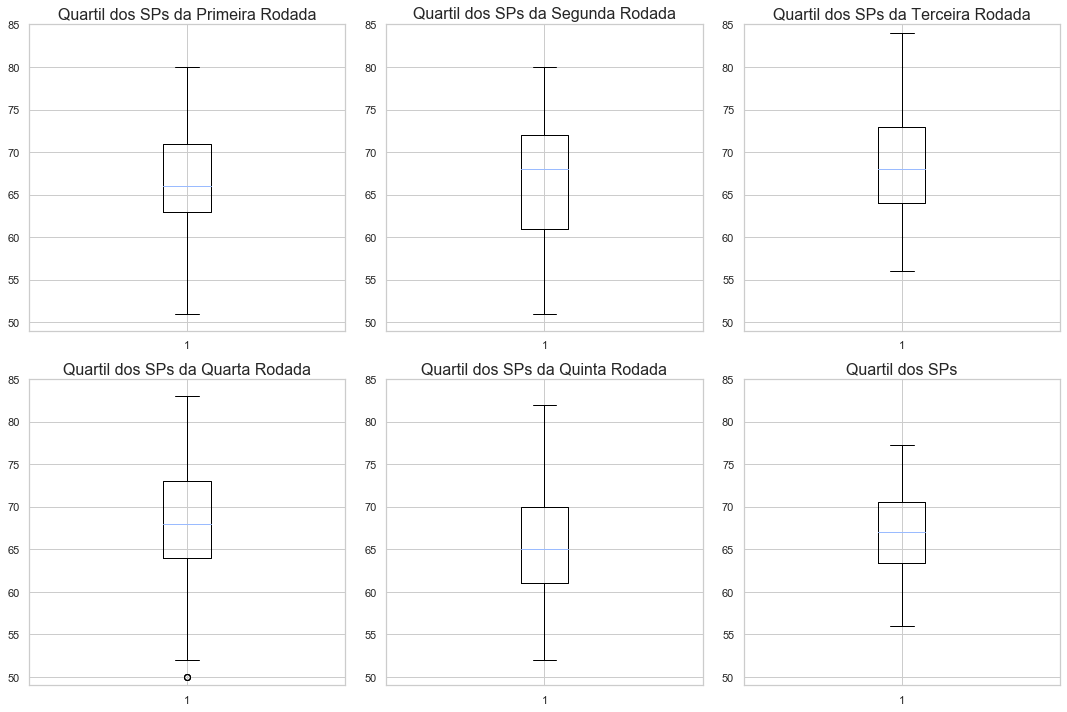

In [15]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
ax[0][0].set_title('Quartil dos SPs da Primeira Rodada',fontsize=16)
ax[0][0].boxplot(spks['Nota1'])
ax[0][0].set_ylim([49,85])
ax[0][1].set_title('Quartil dos SPs da Segunda Rodada',fontsize=16)
ax[0][1].boxplot(spks['Nota2'])
ax[0][1].set_ylim([49,85])
ax[0][2].set_title('Quartil dos SPs da Terceira Rodada',fontsize=16)
ax[0][2].boxplot(spks['Nota3'])
ax[0][2].set_ylim([49,85])
ax[1][0].set_title('Quartil dos SPs da Quarta Rodada',fontsize=16)
ax[1][0].boxplot(spks['Nota4'])
ax[1][0].set_ylim([49,85])
ax[1][1].set_title('Quartil dos SPs da Quinta Rodada',fontsize=16)
ax[1][1].boxplot(spks['Nota5'])
ax[1][1].set_ylim([49,85])
ax[1][2].set_title('Quartil dos SPs',fontsize=16)
ax[1][2].boxplot(spks['Nota Final'])
ax[1][2].set_ylim([49,85])
plt.tight_layout()
plt.show()

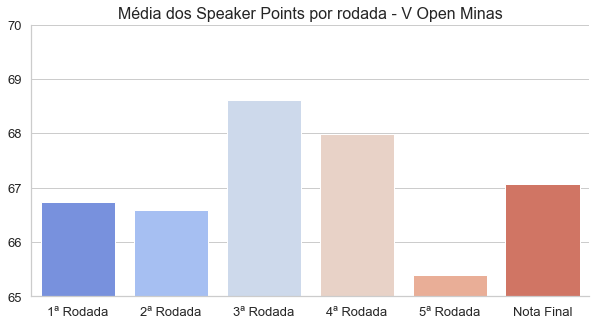

In [16]:
desvio_speaks=[spks.loc[:,'Nota1'].std(),spks.loc[:,'Nota2'].std(),spks.loc[:,'Nota3'].std(),spks.loc[:,'Nota4'].std(),spks.loc[:,'Nota5'].std(),spks.loc[:,'Nota Final'].std()]
arr2=np.array(desvio_speaks)
media_speaks=[spks.loc[:,'Nota1'].mean(),spks.loc[:,'Nota2'].mean(),spks.loc[:,'Nota3'].mean(),spks.loc[:,'Nota4'].mean(),spks.loc[:,'Nota5'].mean(),spks.loc[:,'Nota Final'].mean()]
arr1=np.array(media_speaks)
rodadas=['1ª Rodada','2ª Rodada','3ª Rodada','4ª Rodada','5ª Rodada','Nota Final']
df1=pd.DataFrame({'Rodadas':rodadas,'Média':arr1,'Desvio Padrão':arr2})
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Média dos Speaker Points por rodada - V Open Minas',fontsize=16)
sns.barplot(x='Rodadas',y='Média',data=df1).set_ylim([65,70])
ax.tick_params(labelsize=13)
ax.set_ylabel('')    
ax.set_xlabel('')
sns.despine()
plt.show()

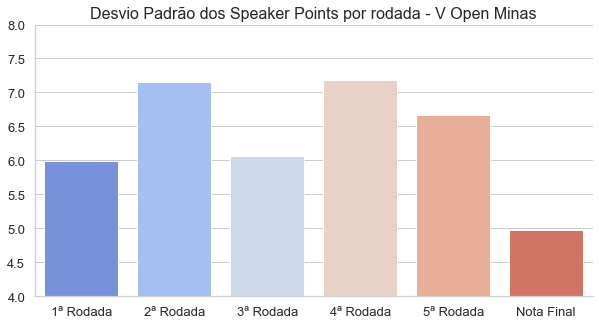

In [17]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Desvio Padrão dos Speaker Points por rodada - V Open Minas',fontsize=16)
sns.barplot(x='Rodadas',y='Desvio Padrão',data=df1).set_ylim([4,8])
ax.tick_params(labelsize=13)
ax.set_ylabel('')    
ax.set_xlabel('')
sns.despine()
plt.show()

### Heatmap das Notas Individuais

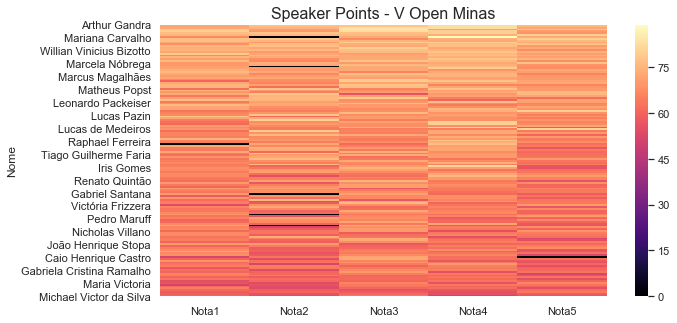

In [18]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Speaker Points - V Open Minas',fontsize=16)
sns.heatmap(speaks,cmap='magma')
plt.show()

#### Mostrando todos os dados:

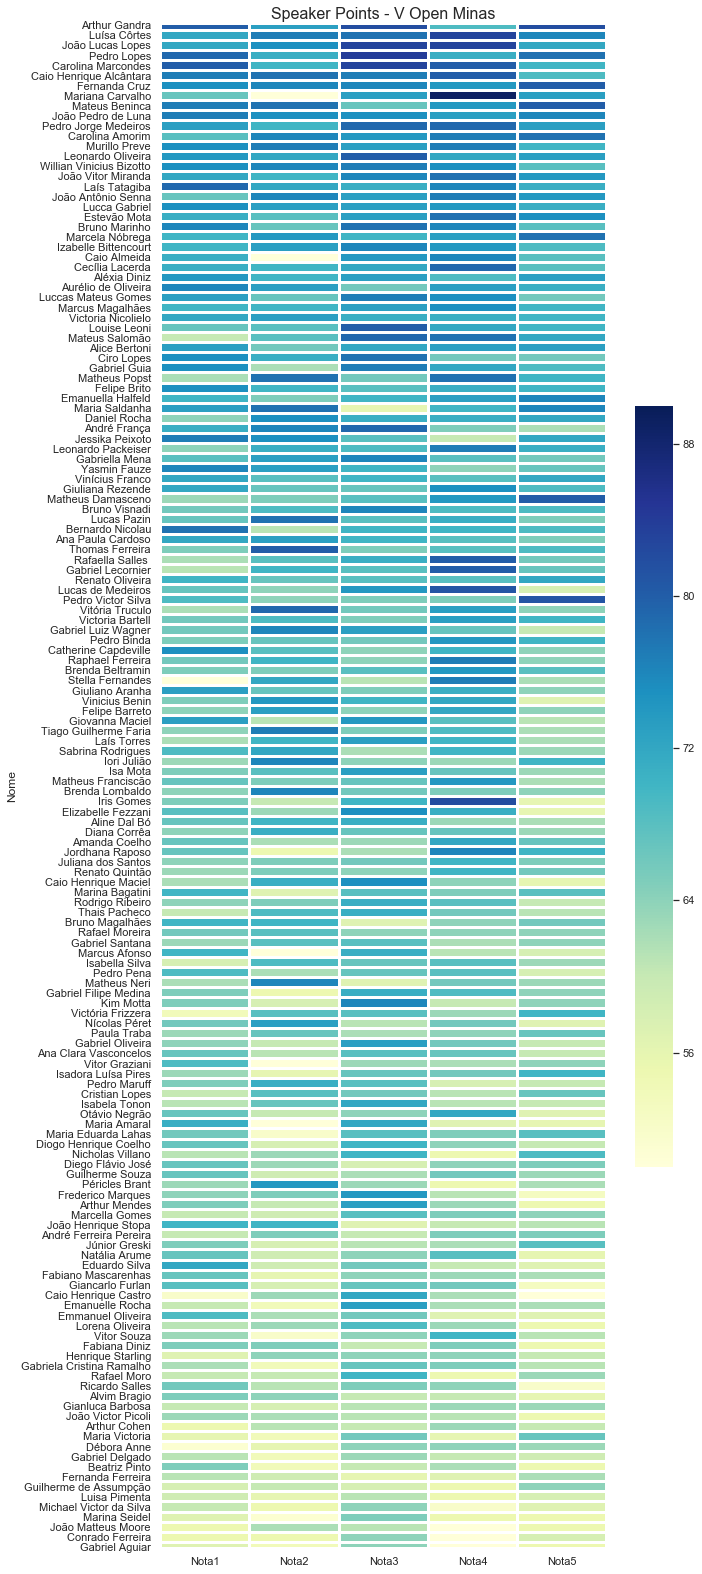

In [19]:
plt.figure(figsize=(10,28))
#plt.figure(figsize=(50,50))
ax=plt.axes()
ax.set_title('Speaker Points - V Open Minas',fontsize=16)
k=sns.heatmap(speaks,cmap='YlGnBu',vmin=50,vmax=90,yticklabels=True,linewidths=2,cbar_kws={"shrink": 0.5})
plt.show()
#plt.savefig("Heatmap_Speaks_V_Open_Minas.pdf",dpi=1000)

#### Uma análise mais detalhada:

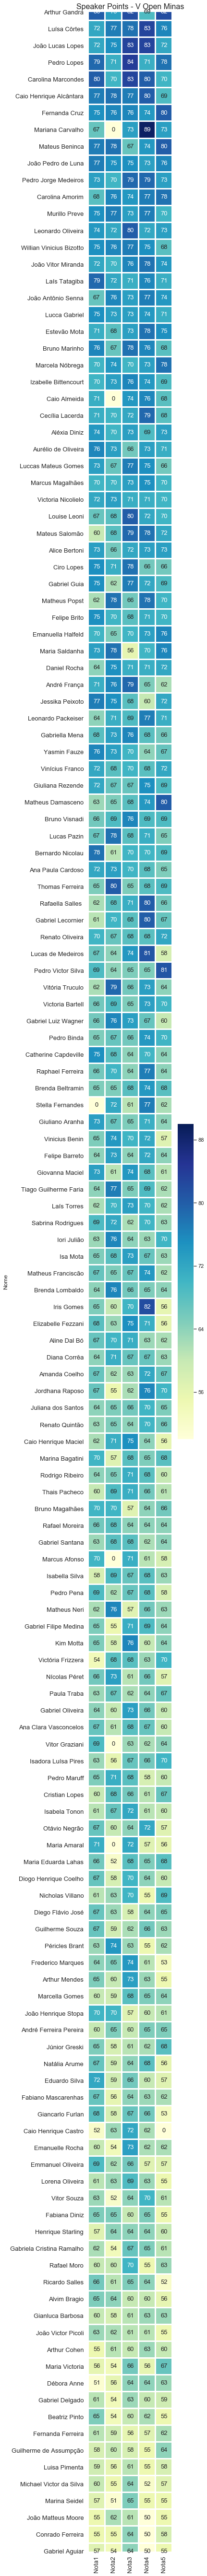

In [20]:
plt.figure(figsize=(5,80))
ax=plt.axes()
ax.set_title('Speaker Points - V Open Minas',fontsize=16)
k=sns.heatmap(speaks,cmap='YlGnBu',vmin=50,vmax=90,yticklabels=True,linewidths=2,square=True,cbar_kws={"shrink": 0.5},annot=True,annot_kws={'fontsize':13})
k.tick_params(labelsize=13)
plt.tight_layout()
#plt.savefig("Heatmap_Speaks_V_Open_Minas(1).pdf",dpi=1000)

### Distribuições das Notas Individuais

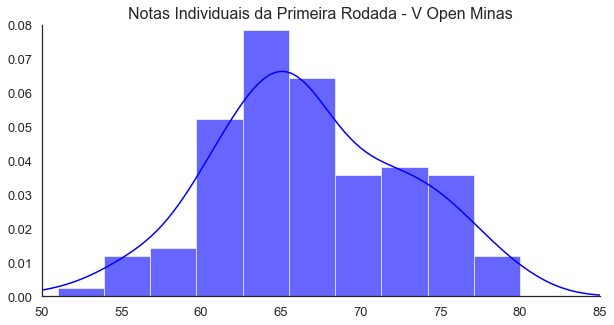

In [95]:
plt.figure(figsize=(10,5))
k=sns.distplot(spks['Nota1'],color='blue',hist_kws={'alpha':0.6},bins=10)
k.set_title('Notas Individuais da Primeira Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
sns.despine()
plt.show()

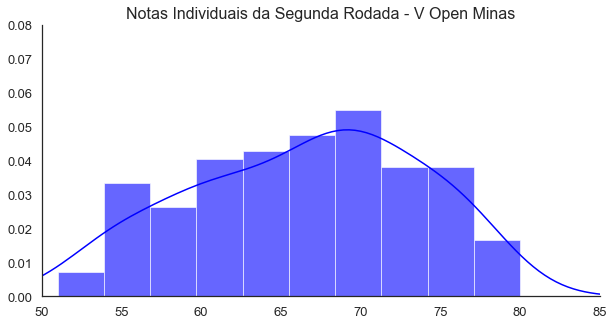

In [96]:
plt.figure(figsize=(10,5))
k=sns.distplot(spks['Nota2'],color='blue',hist_kws={'alpha':0.6},bins=10)
k.set_title('Notas Individuais da Segunda Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
sns.despine()
plt.show()

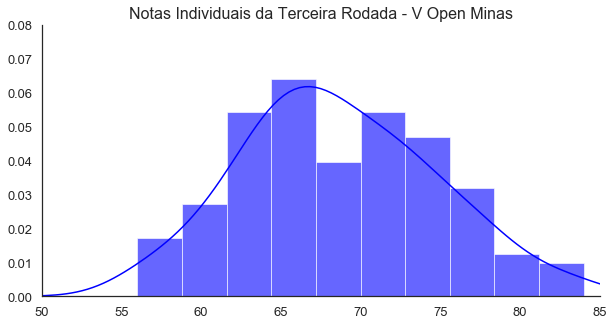

In [97]:
plt.figure(figsize=(10,5))
k=sns.distplot(spks['Nota3'],color='blue',hist_kws={'alpha':0.6},bins=10)
k.set_title('Notas Individuais da Terceira Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
sns.despine()
plt.show()

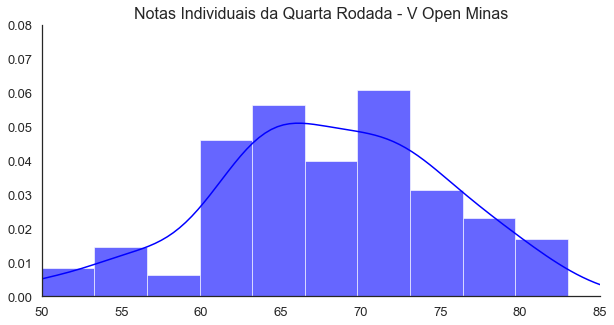

In [98]:
plt.figure(figsize=(10,5))
k=sns.distplot(spks['Nota4'],color='blue',hist_kws={'alpha':0.6},bins=10)
k.set_title('Notas Individuais da Quarta Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
sns.despine()
plt.show()

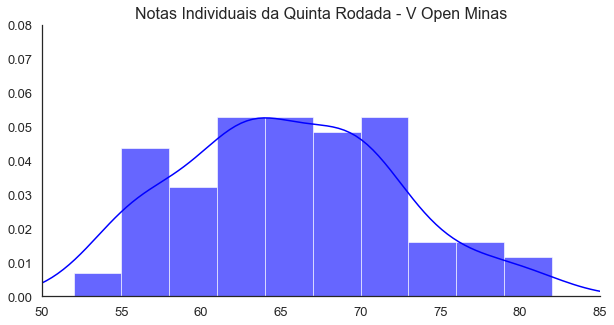

In [103]:
plt.figure(figsize=(10,5))
k=sns.distplot(spks['Nota5'],color='blue',hist_kws={'alpha':0.6},bins=10)
k.set_title('Notas Individuais da Quinta Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
sns.despine()
plt.show()

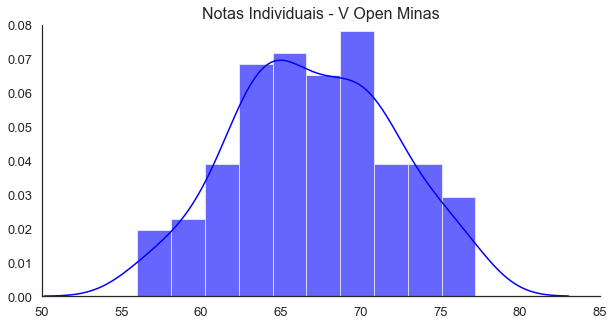

In [105]:
plt.figure(figsize=(10,5))
k=sns.distplot(spks['Nota Final'],color='blue',hist_kws={'alpha':0.6},bins=10)
k.set_title('Notas Individuais - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
sns.despine()
plt.show()

#### Resumindo:

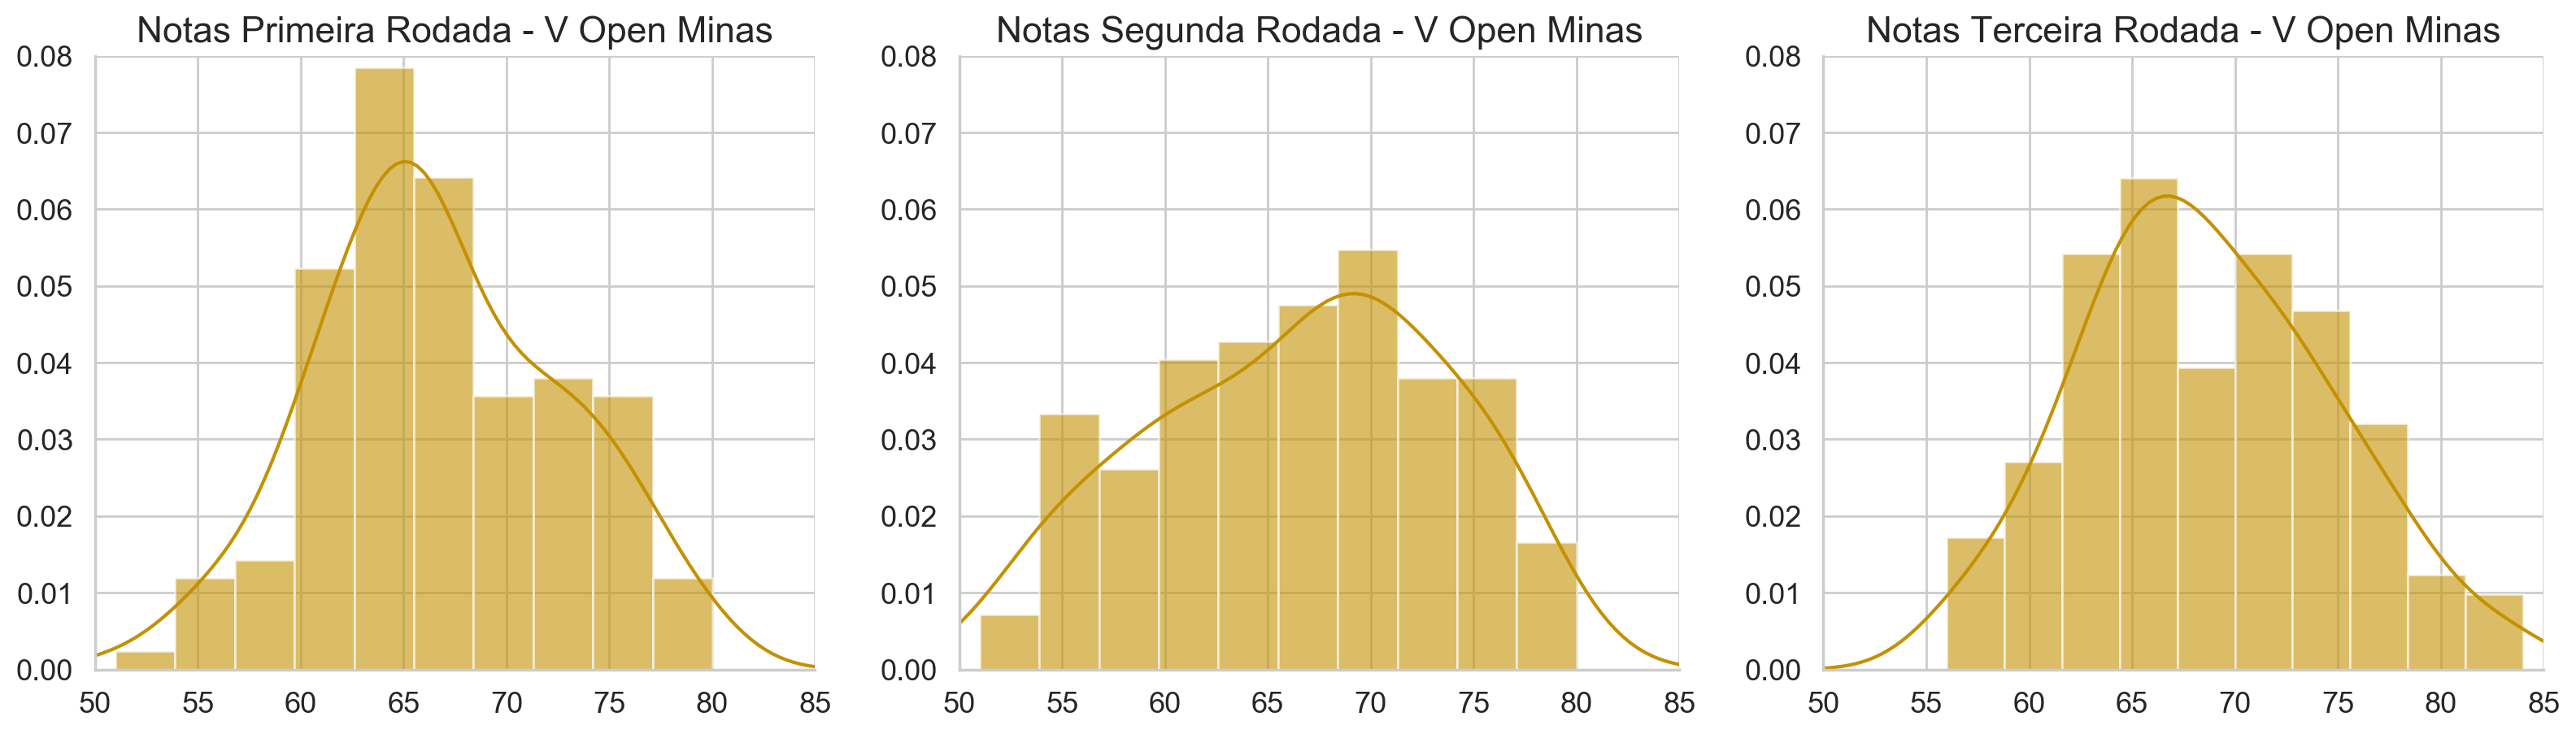

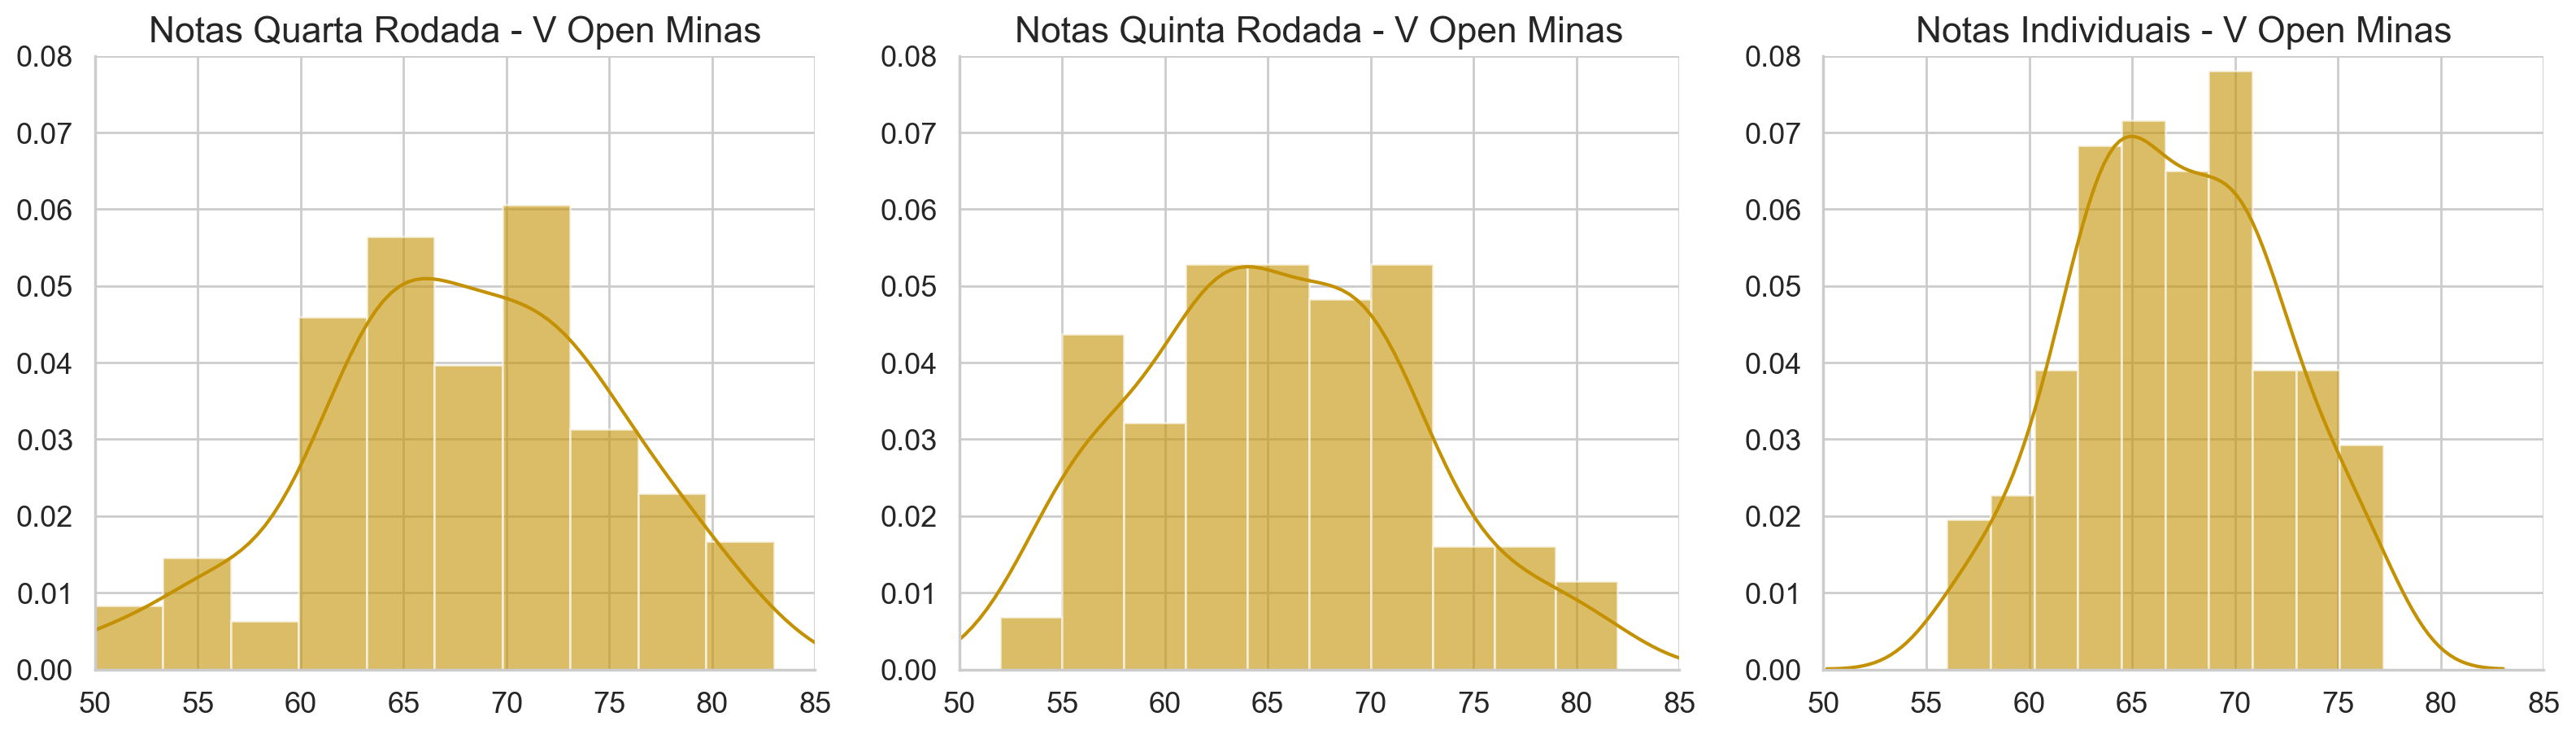

In [187]:
plt.figure(figsize=(40,5),dpi=200)
plt.subplot(1,6,1)
k=sns.distplot(spks['Nota1'],color='#C49102',hist_kws={'alpha':0.6},bins=10)
k.set_title('Notas Primeira Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
plt.subplot(1,6,2)
k=sns.distplot(spks['Nota2'],color='#C49102',hist_kws={'alpha':0.6},bins=10)
k.set_title('Notas Segunda Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
plt.subplot(1,6,3)
k=sns.distplot(spks['Nota3'],color='#C49102',hist_kws={'alpha':0.6},bins=10)
k.set_title('Notas Terceira Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
sns.despine()
plt.show()
plt.figure(figsize=(40,5),dpi=200)
plt.subplot(1,6,1)
k=sns.distplot(spks['Nota4'],color='#C49102',hist_kws={'alpha':0.6},bins=10)
k.set_title('Notas Quarta Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
plt.subplot(1,6,2)
k=sns.distplot(spks['Nota5'],color='#C49102',hist_kws={'alpha':0.6},bins=10)
k.set_title('Notas Quinta Rodada - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
plt.subplot(1,6,3)
k=sns.distplot(spks['Nota Final'],color='#C49102',hist_kws={'alpha':0.6},bins=10)
k.set_title('Notas Individuais - V Open Minas',fontsize=16)
k.tick_params(labelsize=13)
k.set_ylim([0,0.08])
k.set_xlim([50,85])
k.set_ylabel('')
k.set_xlabel('')
sns.despine()
plt.show()

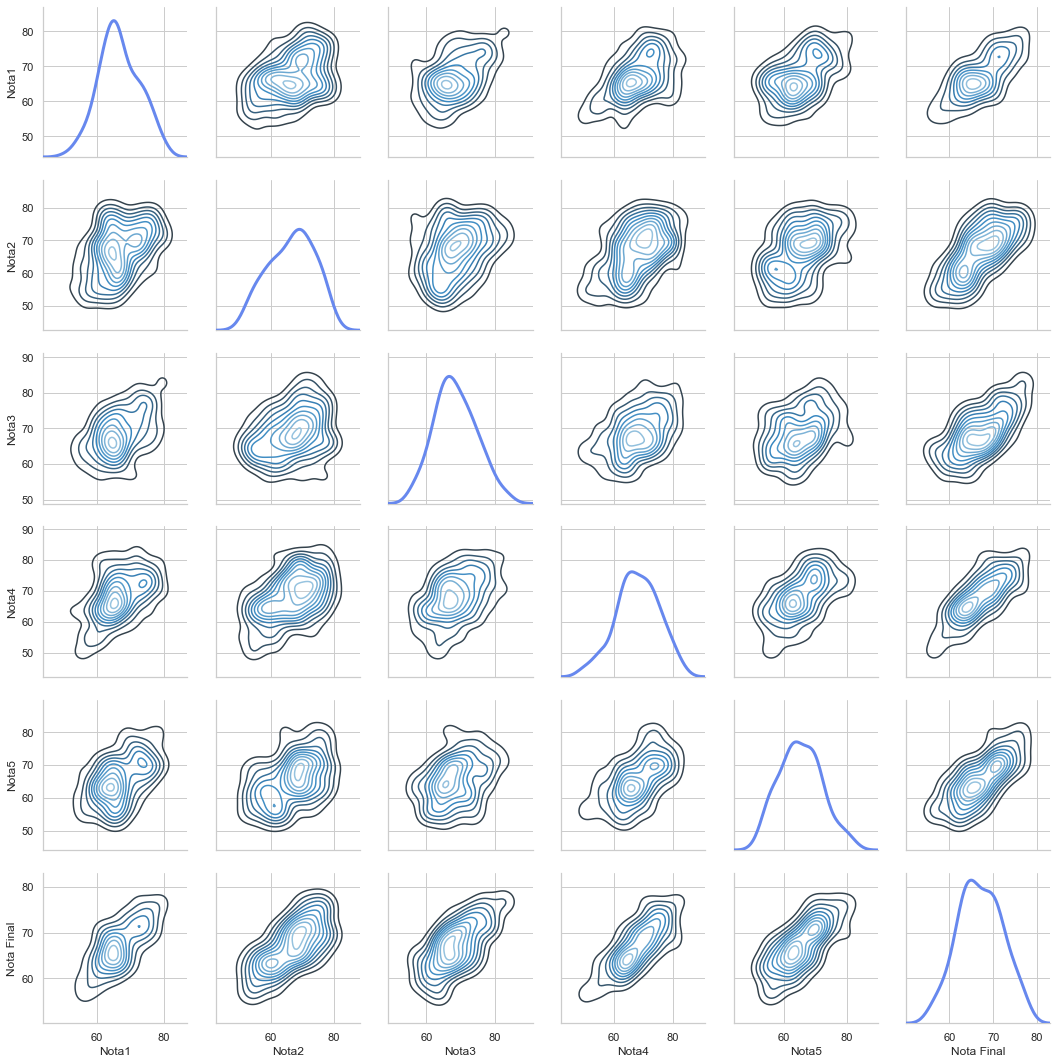

In [186]:
h=sns.PairGrid(spks)
h.map_diag(sns.kdeplot,lw=3,legend=False)
h.map_offdiag(sns.kdeplot,cmap="Blues_d")
plt.show()

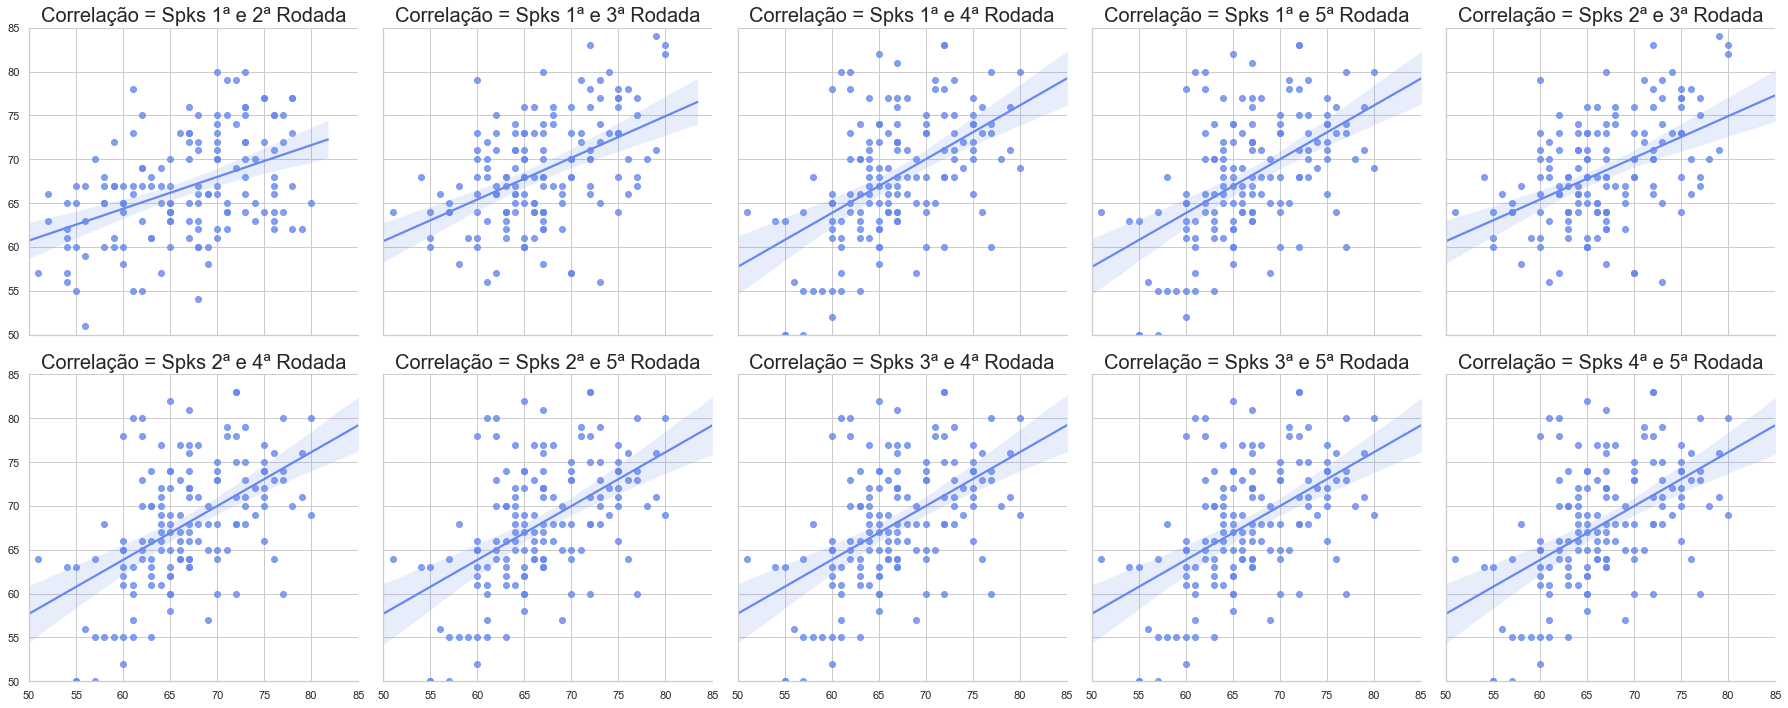

In [167]:
dado=pd.DataFrame(columns=['Correlação','N1','N2'])
dado['N2']=spks['Nota1']
dado['N1']=spks['Nota2']
dado['Correlação']='Spks 1ª e 2ª Rodada'
for i in range(0,145):
    dado.loc[145+i,'N1']=spks['Nota1'][i]
    dado.loc[145+i,'N2']=spks['Nota3'][i]
    dado.loc[145+i,'Correlação']='Spks 1ª e 3ª Rodada'
    dado.loc[290+i,'N1']=spks['Nota1'][i]
    dado.loc[290+i,'N2']=spks['Nota4'][i]
    dado.loc[290+i,'Correlação']='Spks 1ª e 4ª Rodada'
    dado.loc[435+i,'N1']=spks['Nota1'][i]
    dado.loc[435+i,'N2']=spks['Nota4'][i]
    dado.loc[435+i,'Correlação']='Spks 1ª e 5ª Rodada'
    dado.loc[580+i,'N1']=spks['Nota1'][i]
    dado.loc[580+i,'N2']=spks['Nota3'][i]
    dado.loc[580+i,'Correlação']='Spks 2ª e 3ª Rodada'
    dado.loc[725+i,'N1']=spks['Nota1'][i]
    dado.loc[725+i,'N2']=spks['Nota4'][i]
    dado.loc[725+i,'Correlação']='Spks 2ª e 4ª Rodada'
    dado.loc[870+i,'N1']=spks['Nota1'][i]
    dado.loc[870+i,'N2']=spks['Nota4'][i]
    dado.loc[870+i,'Correlação']='Spks 2ª e 5ª Rodada'
    dado.loc[1015+i,'N1']=spks['Nota1'][i]
    dado.loc[1015+i,'N2']=spks['Nota4'][i]
    dado.loc[1015+i,'Correlação']='Spks 3ª e 4ª Rodada'
    dado.loc[1160+i,'N1']=spks['Nota1'][i]
    dado.loc[1160+i,'N2']=spks['Nota4'][i]
    dado.loc[1160+i,'Correlação']='Spks 3ª e 5ª Rodada'
    dado.loc[1305+i,'N1']=spks['Nota1'][i]
    dado.loc[1305+i,'N2']=spks['Nota4'][i]
    dado.loc[1305+i,'Correlação']='Spks 4ª e 5ª Rodada'
dado['N1']=dado['N1'].astype('float32')
dado['N2']=dado['N2'].astype('float32')
k=sns.lmplot(data=dado,x='N1',y='N2',col='Correlação',col_wrap=5)
k.set(ylim=(50,85),xlim=(50,85))
k.set_titles(size=20)
k.set(ylabel='',xlabel='')
sns.despine()
plt.tight_layout()

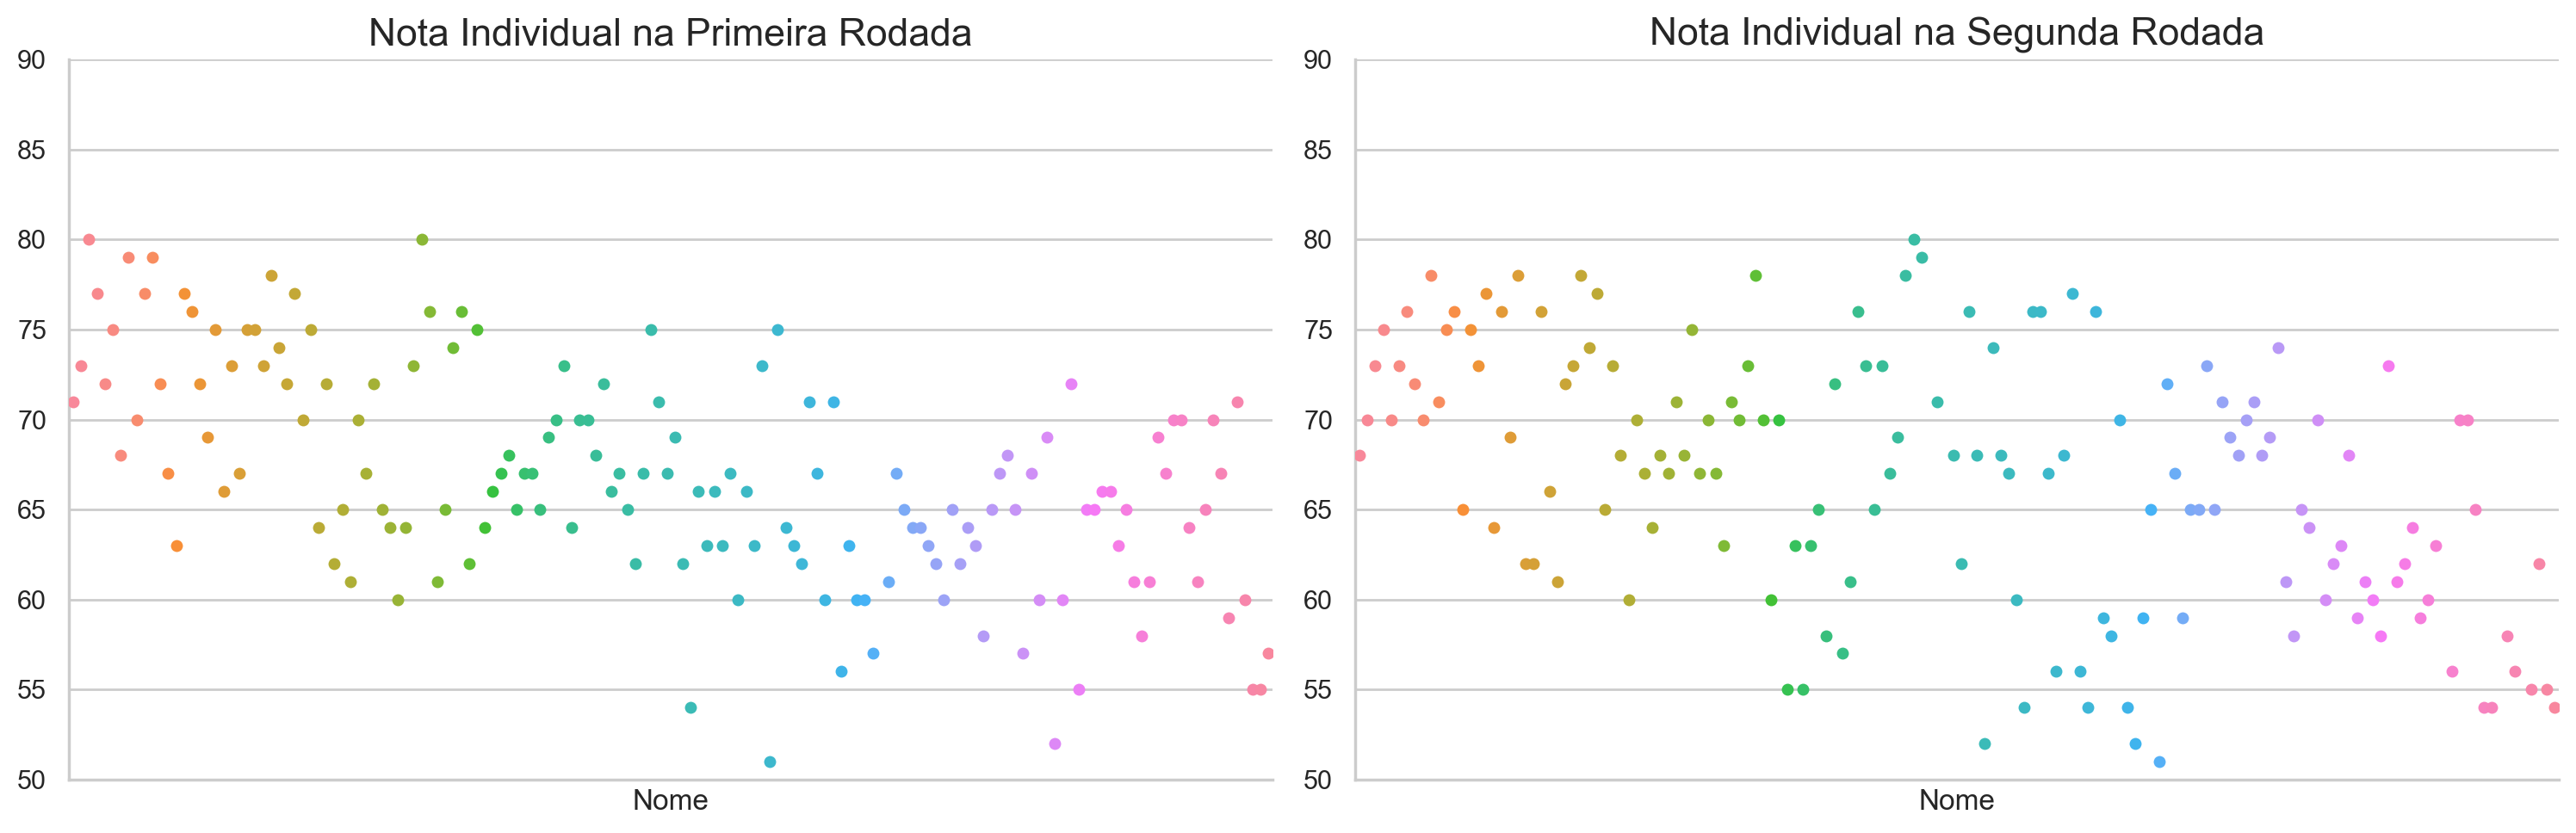

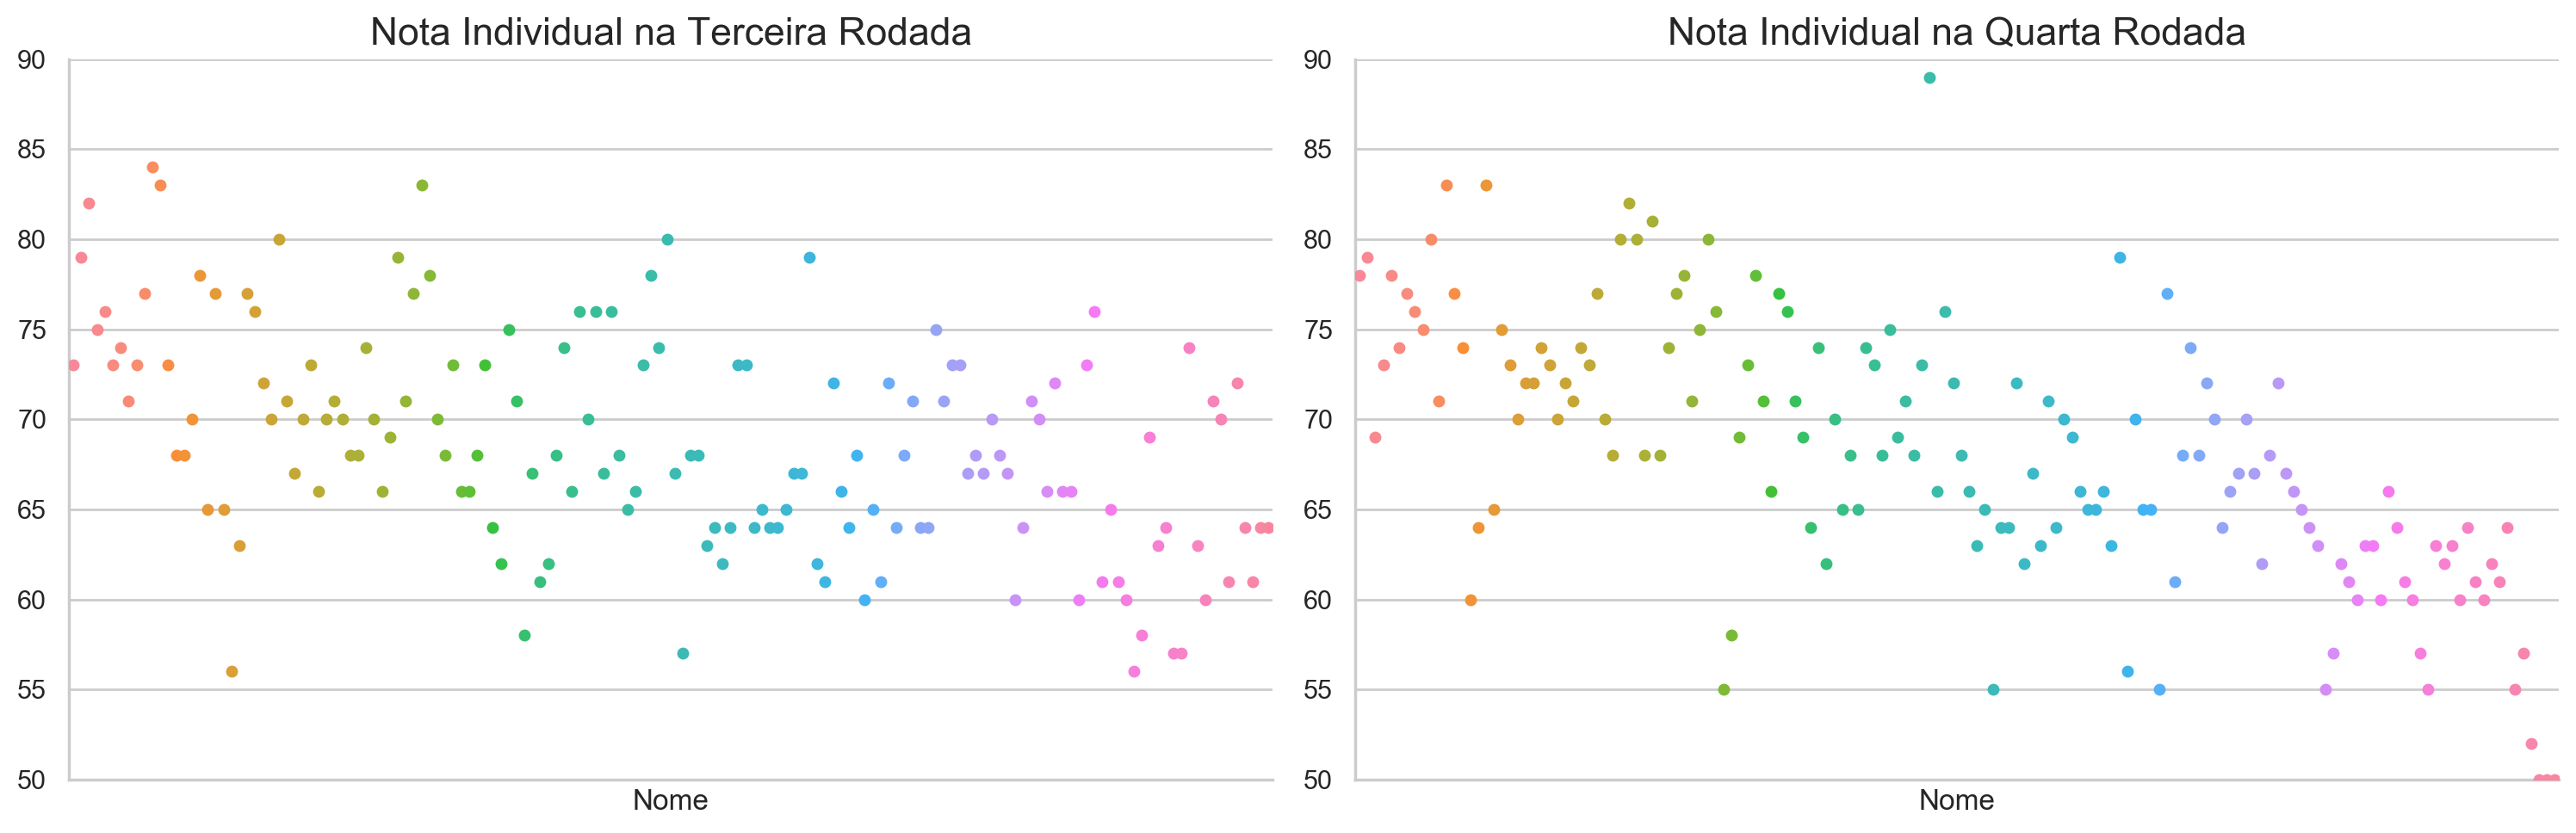

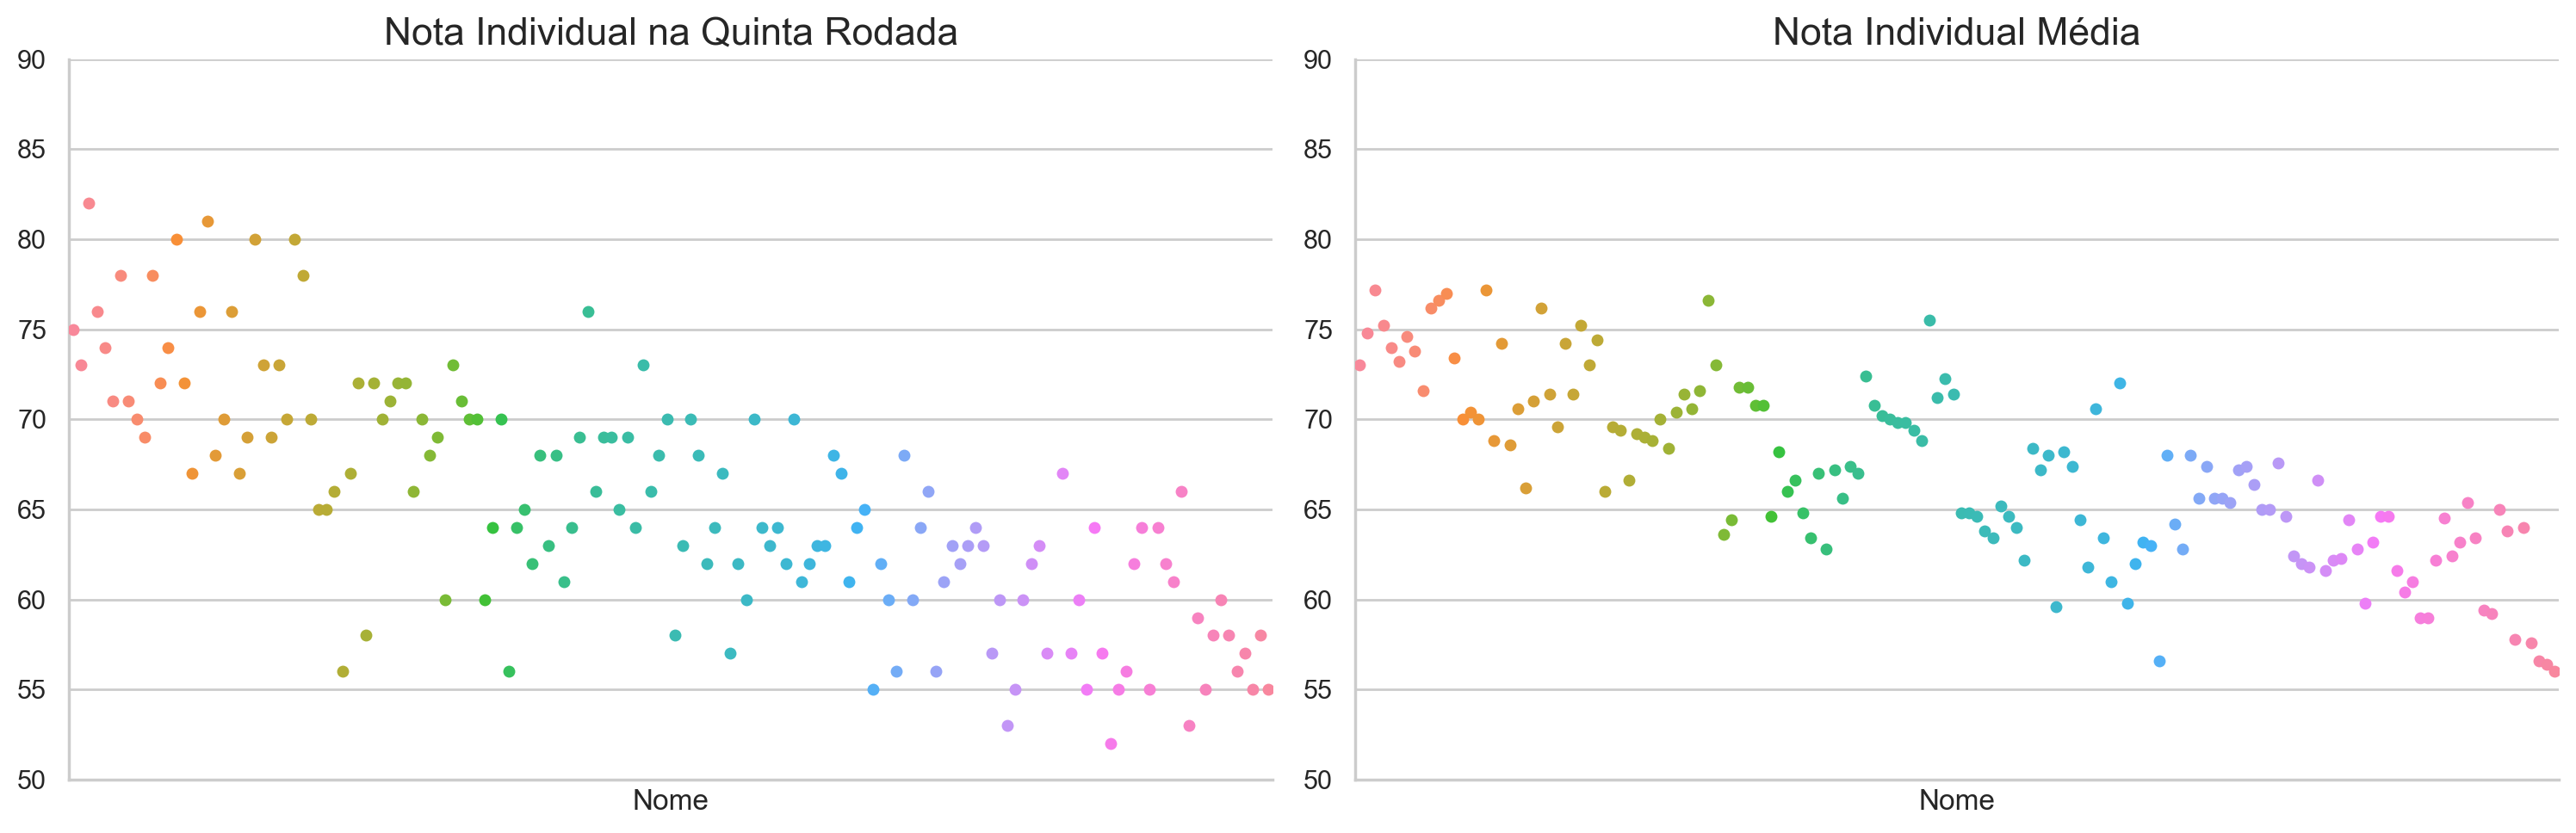

In [214]:
plt.figure(figsize=(45,5),dpi=200)
plt.subplot(1,6,1)
a=sns.swarmplot(x="Nome",y="Nota1",data=vopen)
a.set_title('Nota Individual na Primeira Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
plt.subplot(1,6,2)
a=sns.swarmplot(x="Nome",y="Nota2",data=vopen)
a.set_title('Nota Individual na Segunda Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
sns.despine()
plt.tight_layout()
plt.figure(figsize=(45,5),dpi=200)
plt.subplot(1,6,1)
a=sns.swarmplot(x="Nome",y="Nota3",data=vopen)
a.set_title('Nota Individual na Terceira Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
plt.subplot(1,6,2)
a=sns.swarmplot(x="Nome",y="Nota4",data=vopen)
a.set_title('Nota Individual na Quarta Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
sns.despine()
plt.tight_layout()
plt.figure(figsize=(45,5),dpi=200)
plt.subplot(1,6,1)
a=sns.swarmplot(x="Nome",y="Nota5",data=vopen)
a.set_title('Nota Individual na Quinta Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
plt.subplot(1,6,2)
a=sns.swarmplot(x="Nome",y="Nota Final",data=vopen)
a.set_title('Nota Individual Média',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
sns.despine()
plt.tight_layout()

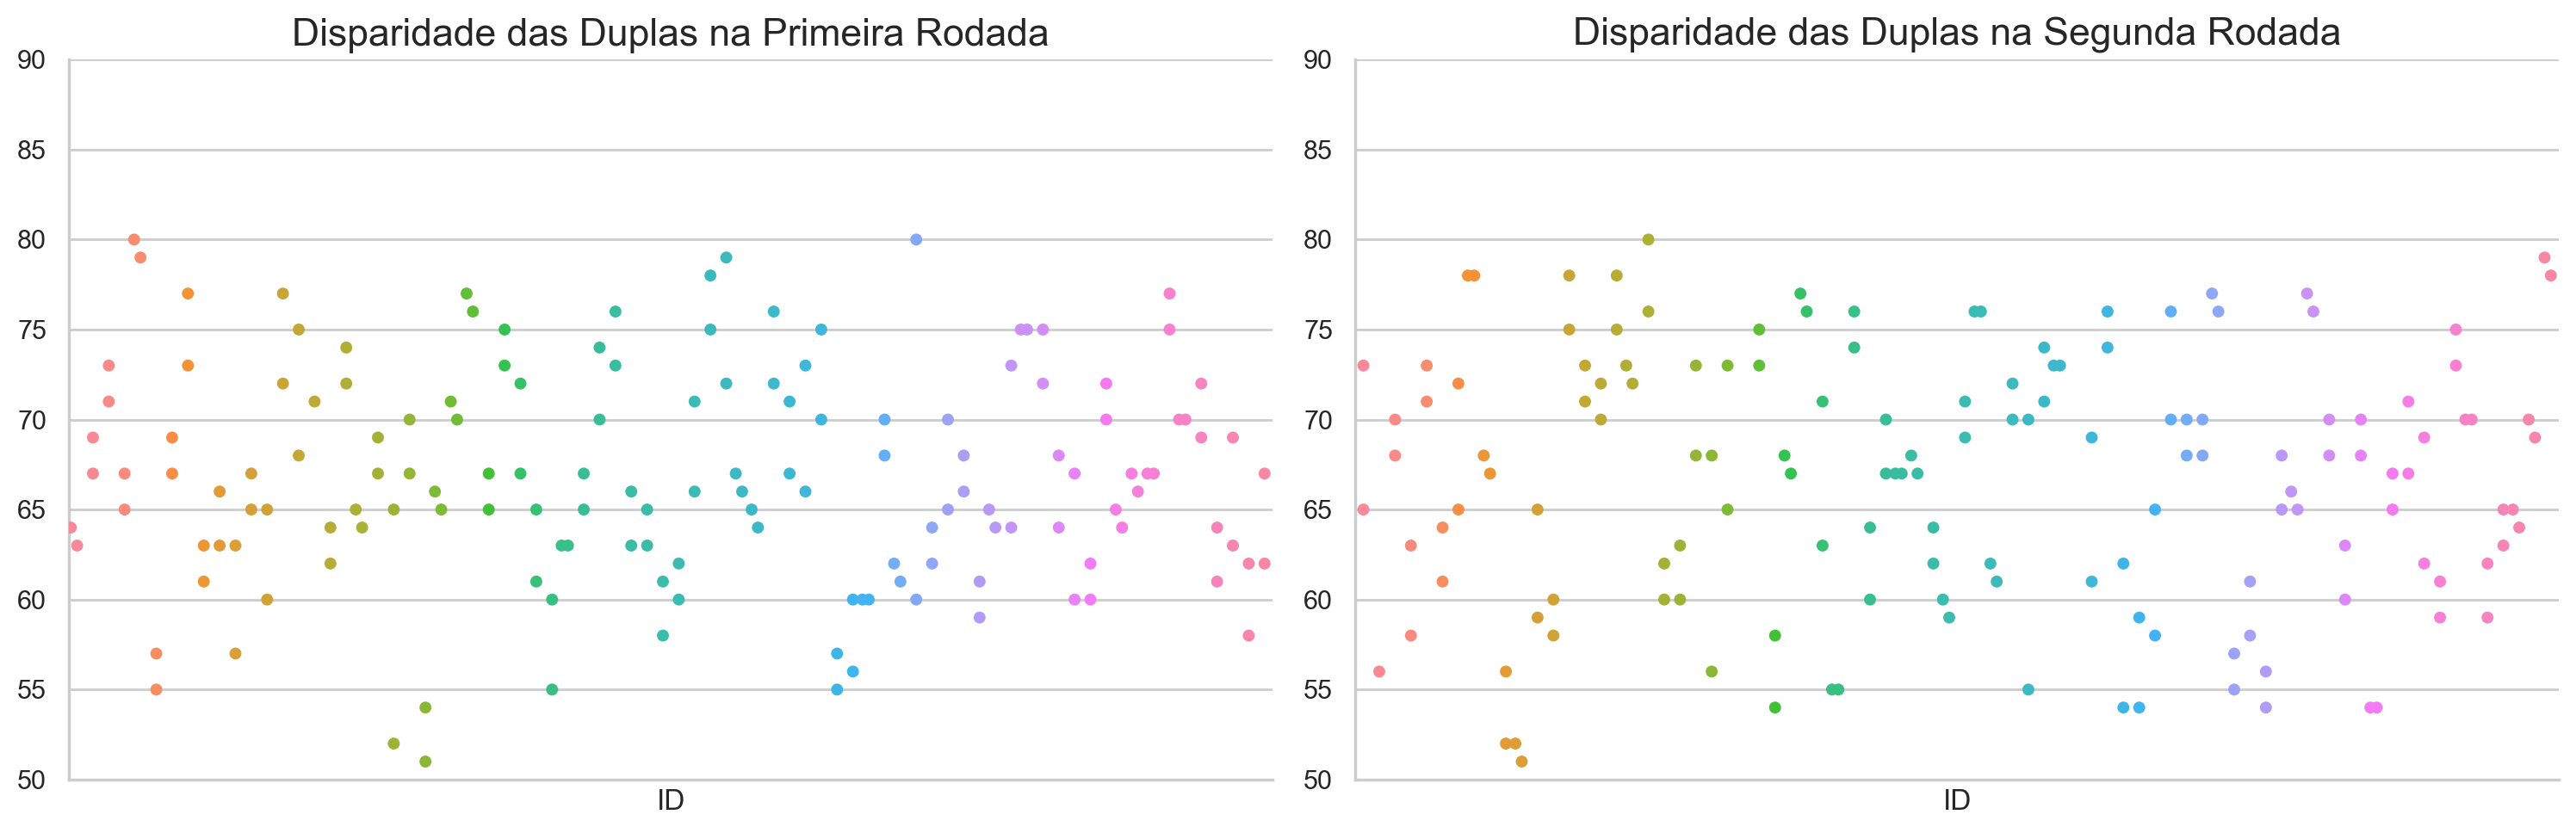

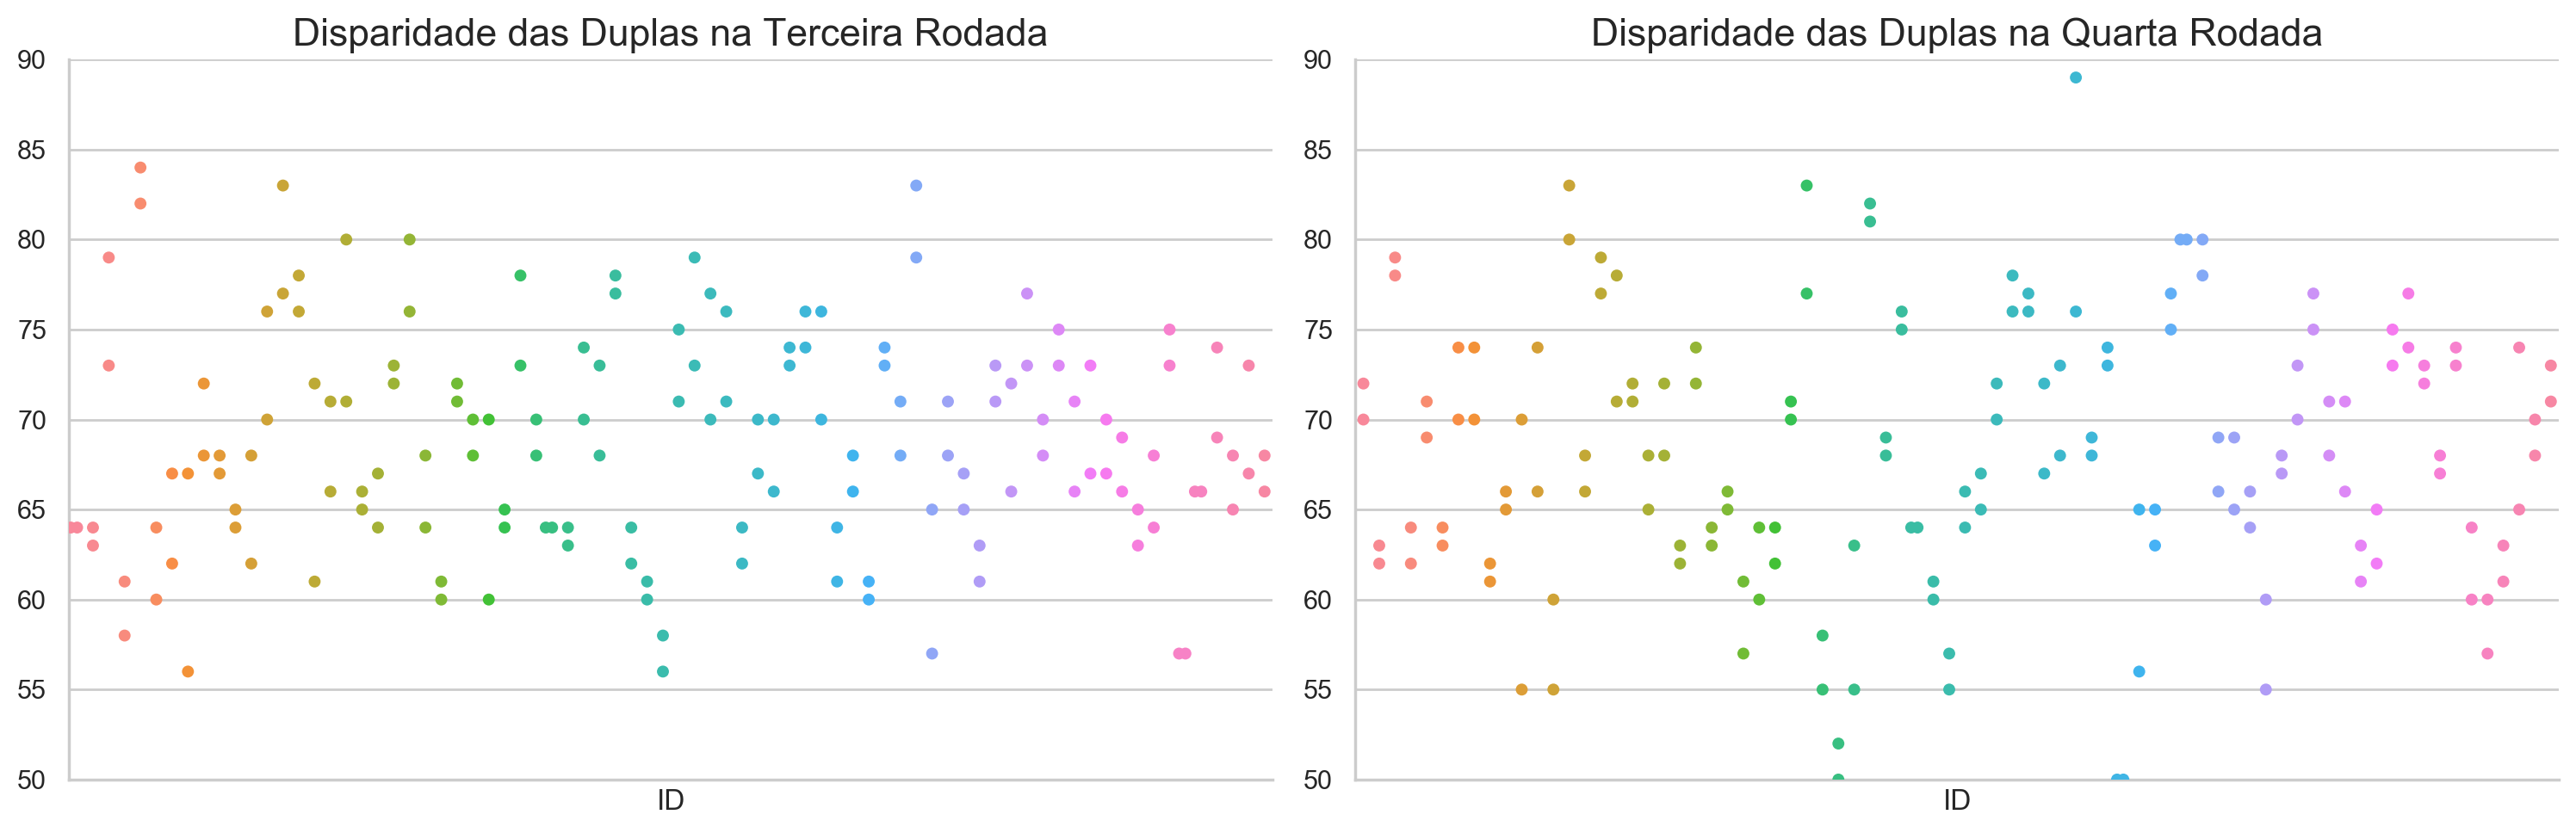

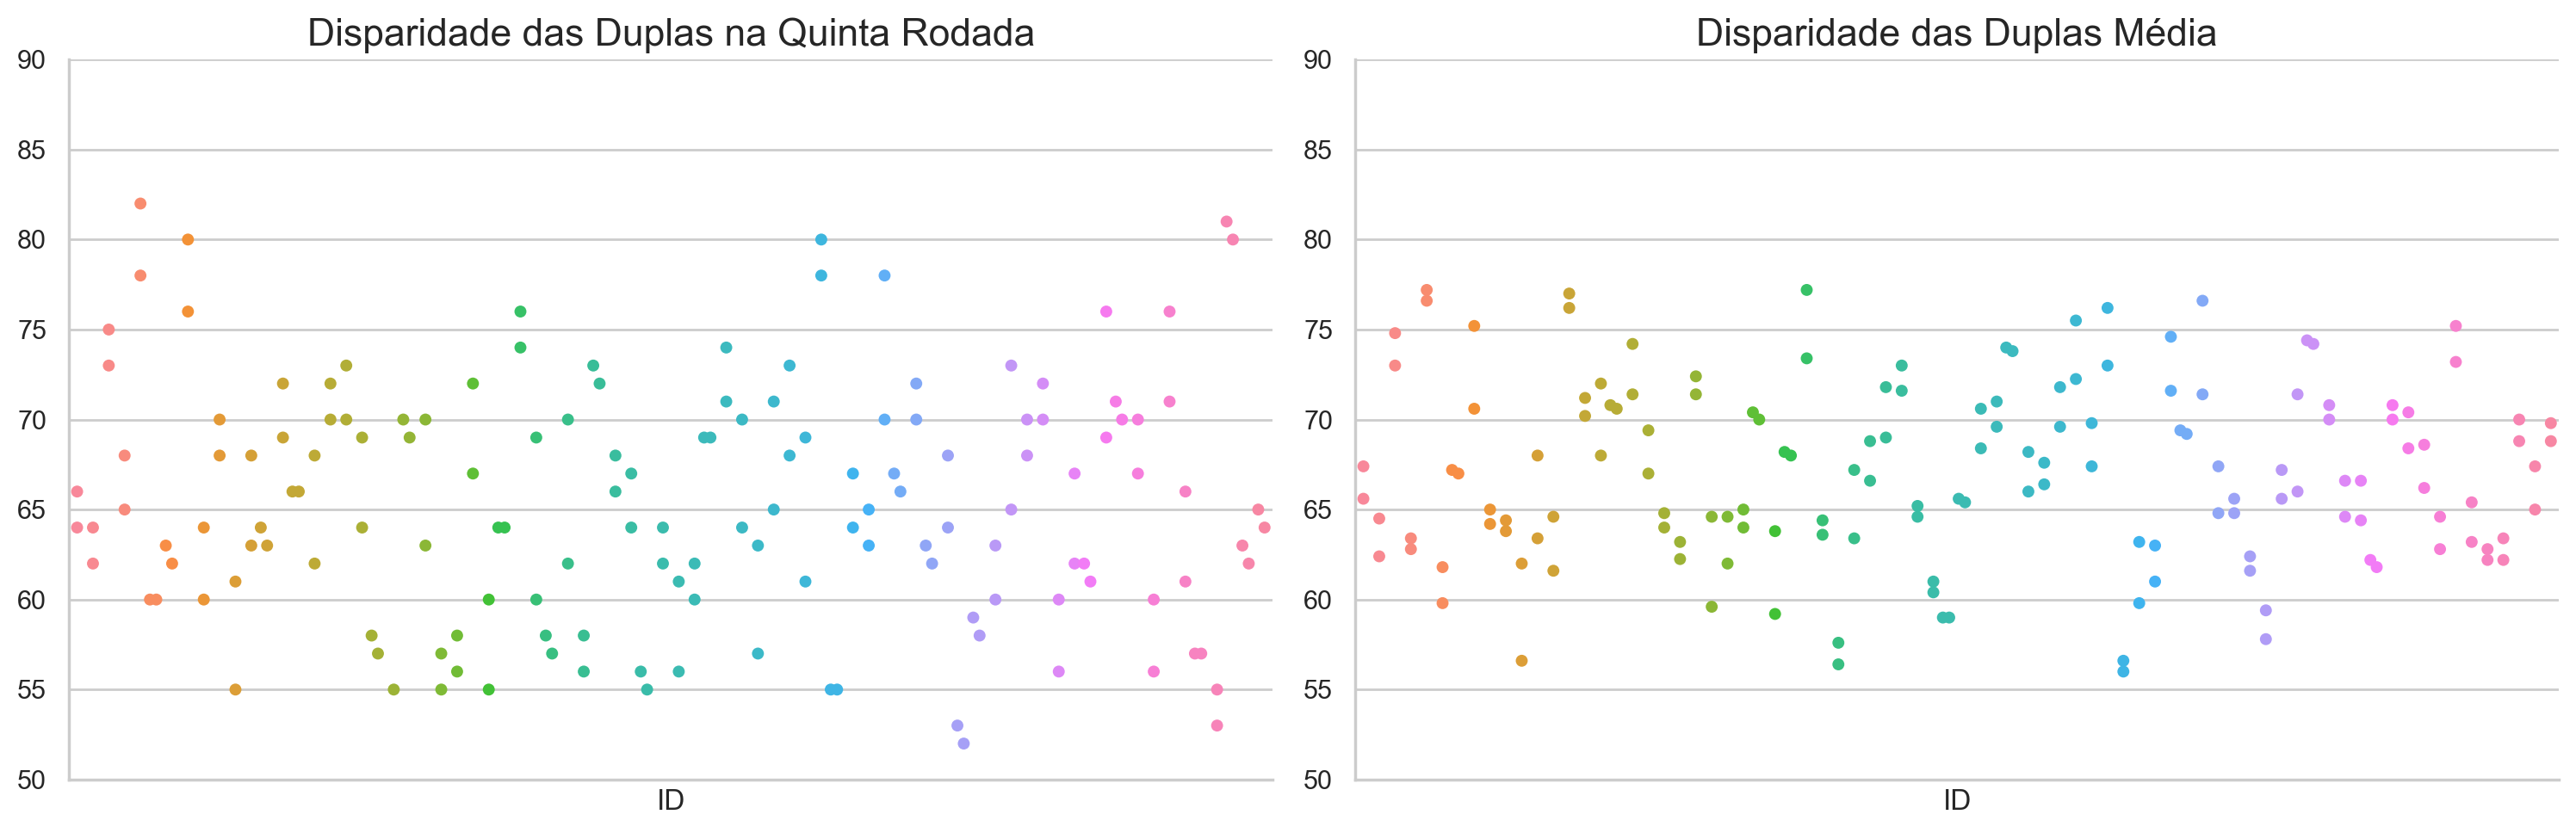

In [211]:
plt.figure(figsize=(45,5),dpi=200)
plt.subplot(1,6,1)
a=sns.swarmplot(x="ID",y="Nota1",data=vopen)
a.set_title('Disparidade das Duplas na Primeira Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
plt.subplot(1,6,2)
a=sns.swarmplot(x="ID",y="Nota2",data=vopen)
a.set_title('Disparidade das Duplas na Segunda Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
sns.despine()
plt.tight_layout()
plt.figure(figsize=(45,5),dpi=200)
plt.subplot(1,6,1)
a=sns.swarmplot(x="ID",y="Nota3",data=vopen)
a.set_title('Disparidade das Duplas na Terceira Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
plt.subplot(1,6,2)
a=sns.swarmplot(x="ID",y="Nota4",data=vopen)
a.set_title('Disparidade das Duplas na Quarta Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
sns.despine()
plt.tight_layout()
plt.figure(figsize=(45,5),dpi=200)
plt.subplot(1,6,1)
a=sns.swarmplot(x="ID",y="Nota5",data=vopen)
a.set_title('Disparidade das Duplas na Quinta Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
plt.subplot(1,6,2)
a=sns.swarmplot(x="ID",y="Nota Final",data=vopen)
a.set_title('Disparidade das Duplas Média',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
sns.despine()
plt.tight_layout()

O gráfico acima mede as diferenças entre as médias das notas individuais dos debatedores de uma mesma dupla.

Os debatedores de uma mesma dupla se encontram no mesmo valor de x.

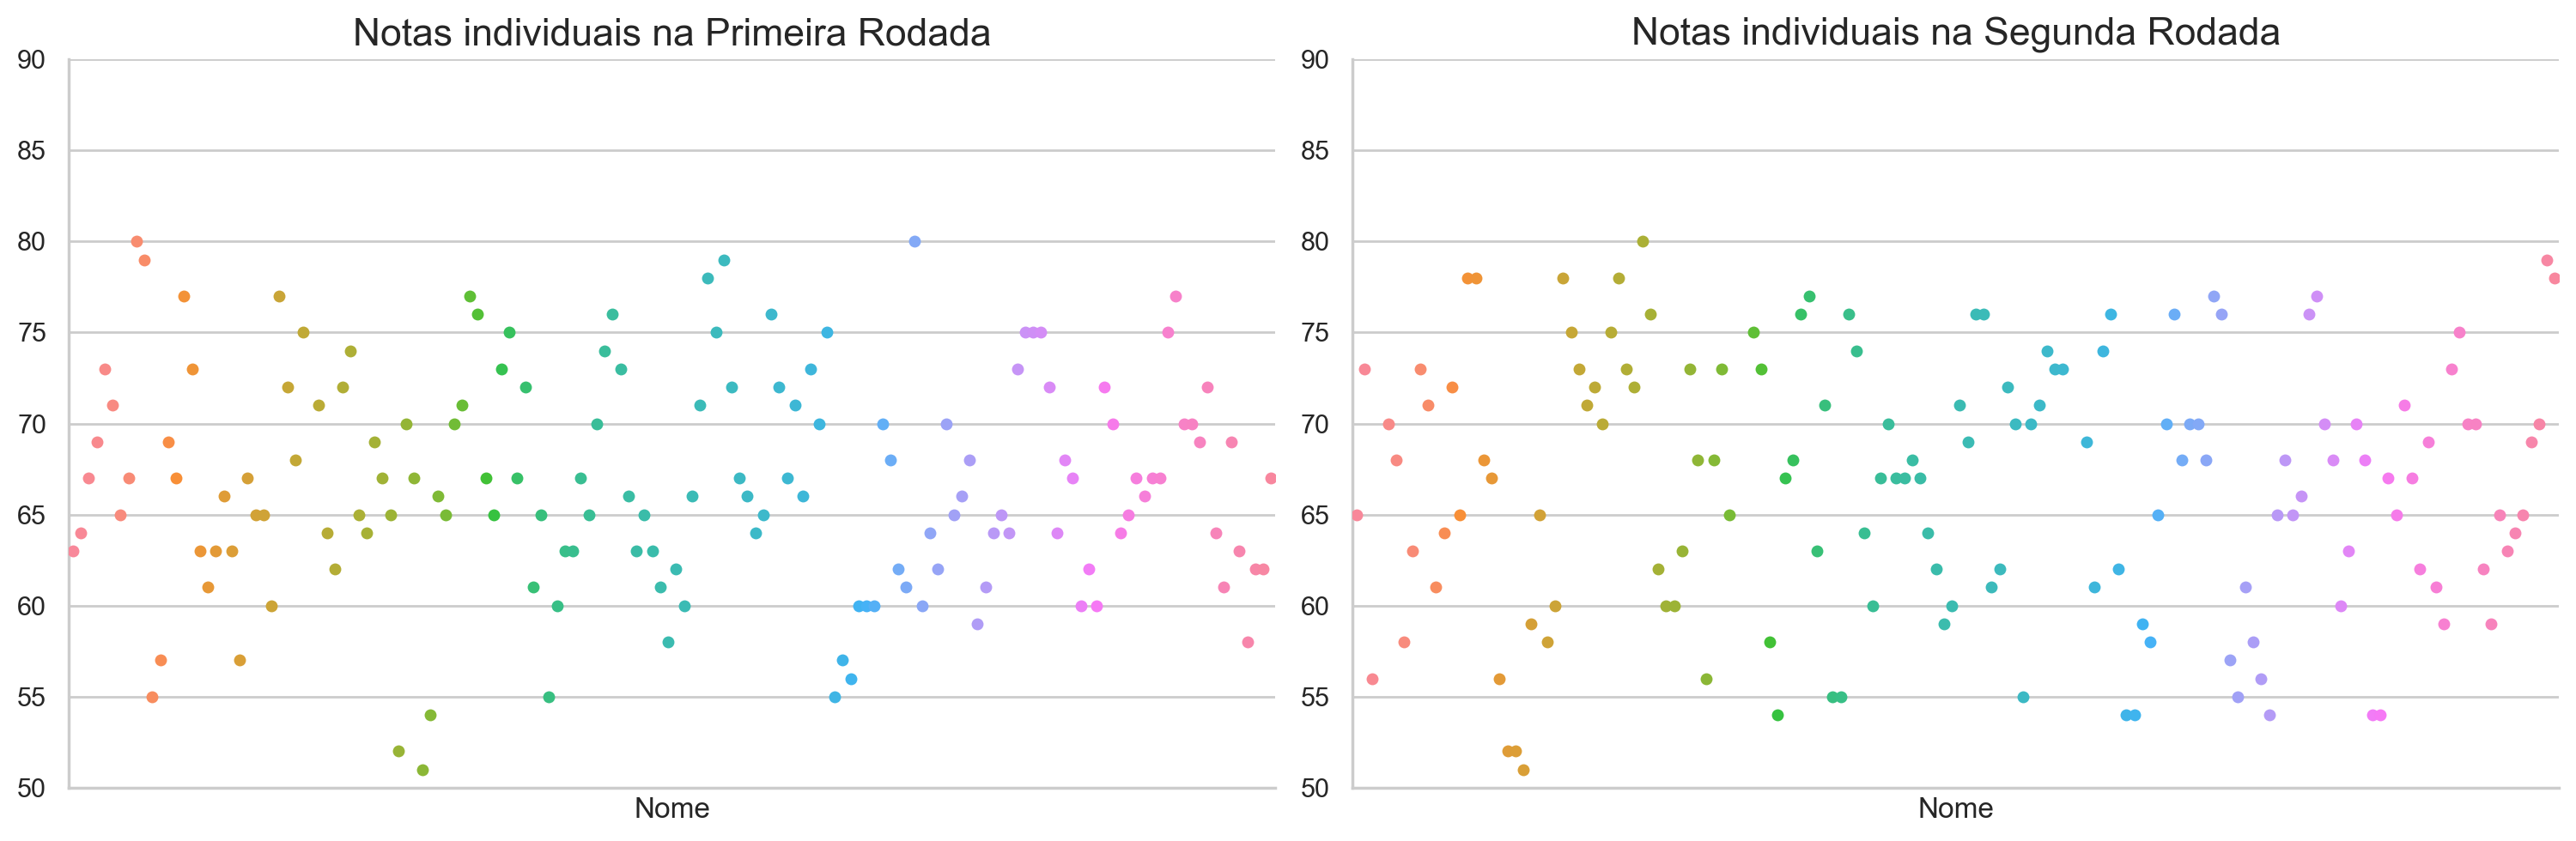

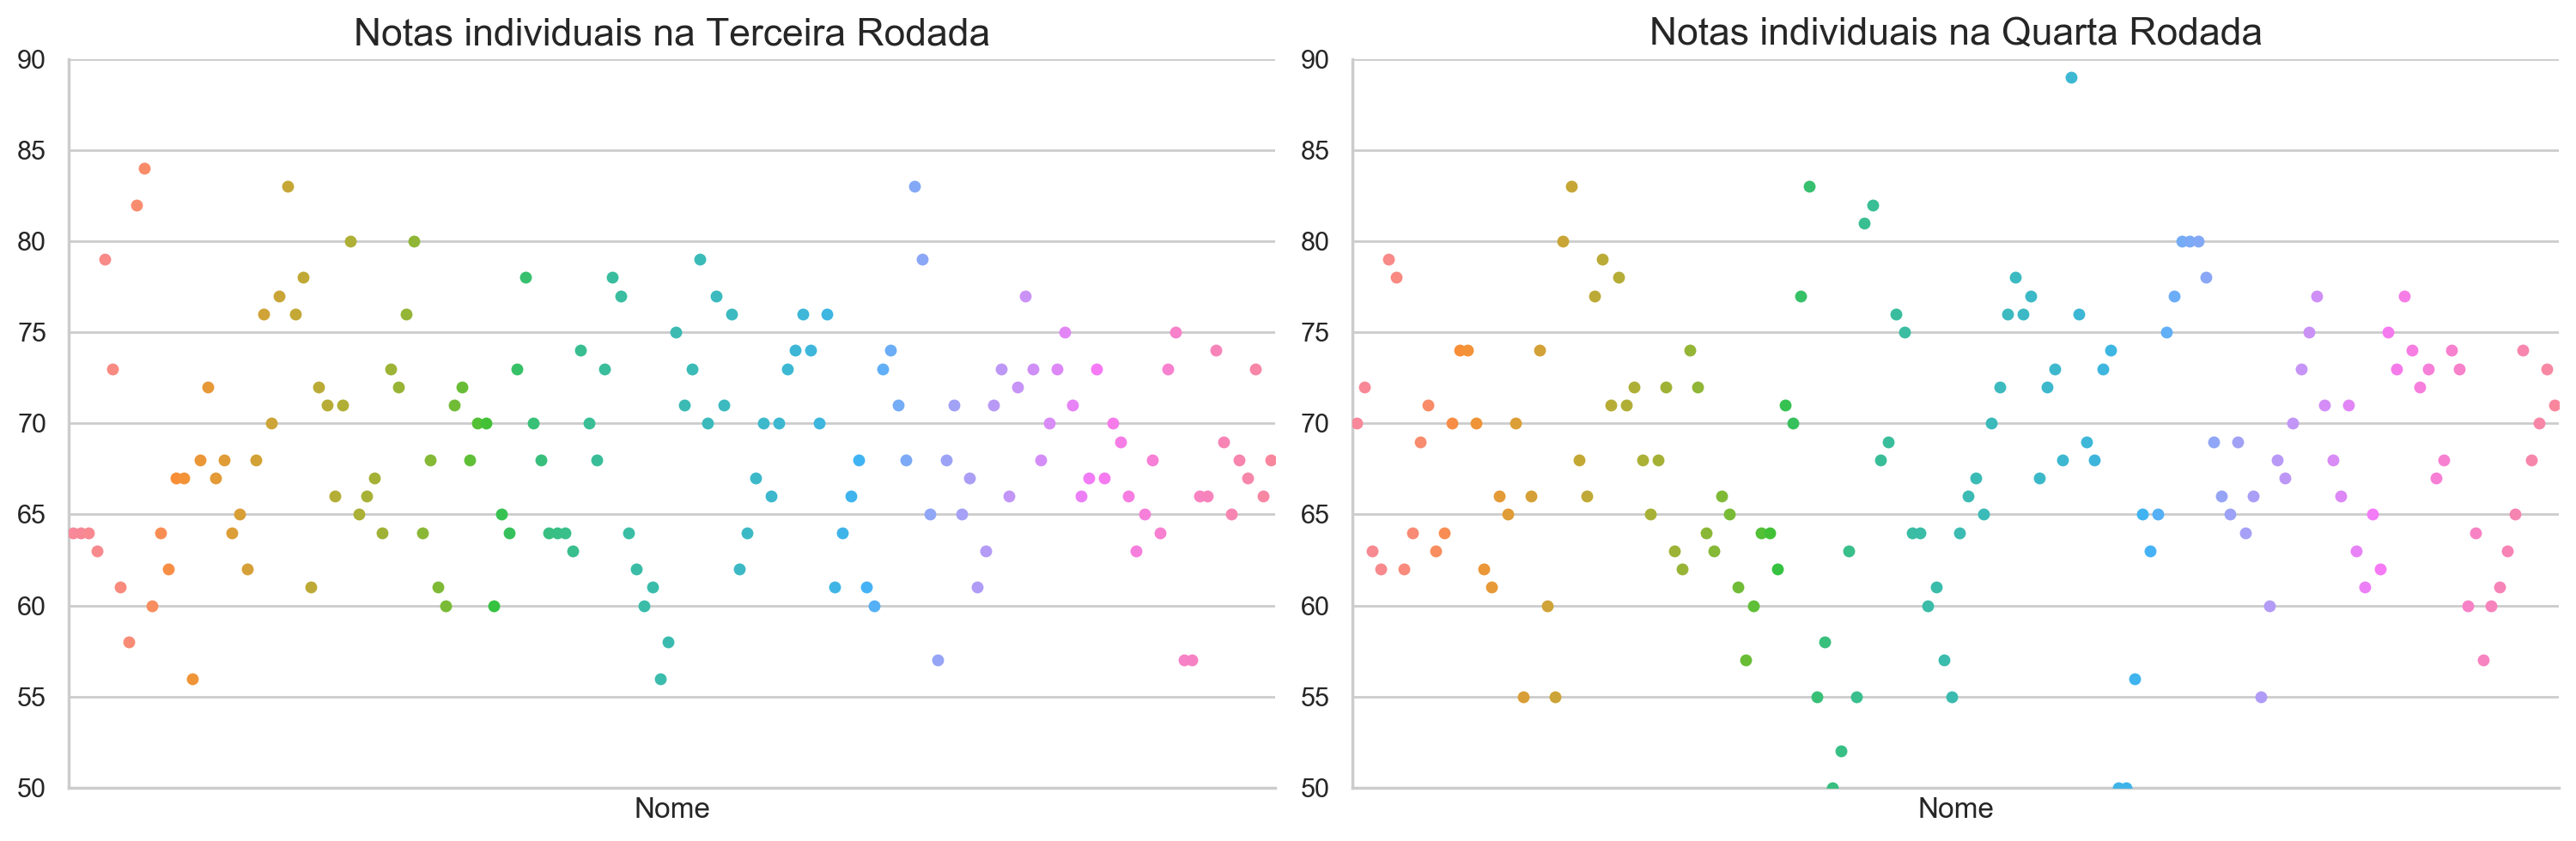

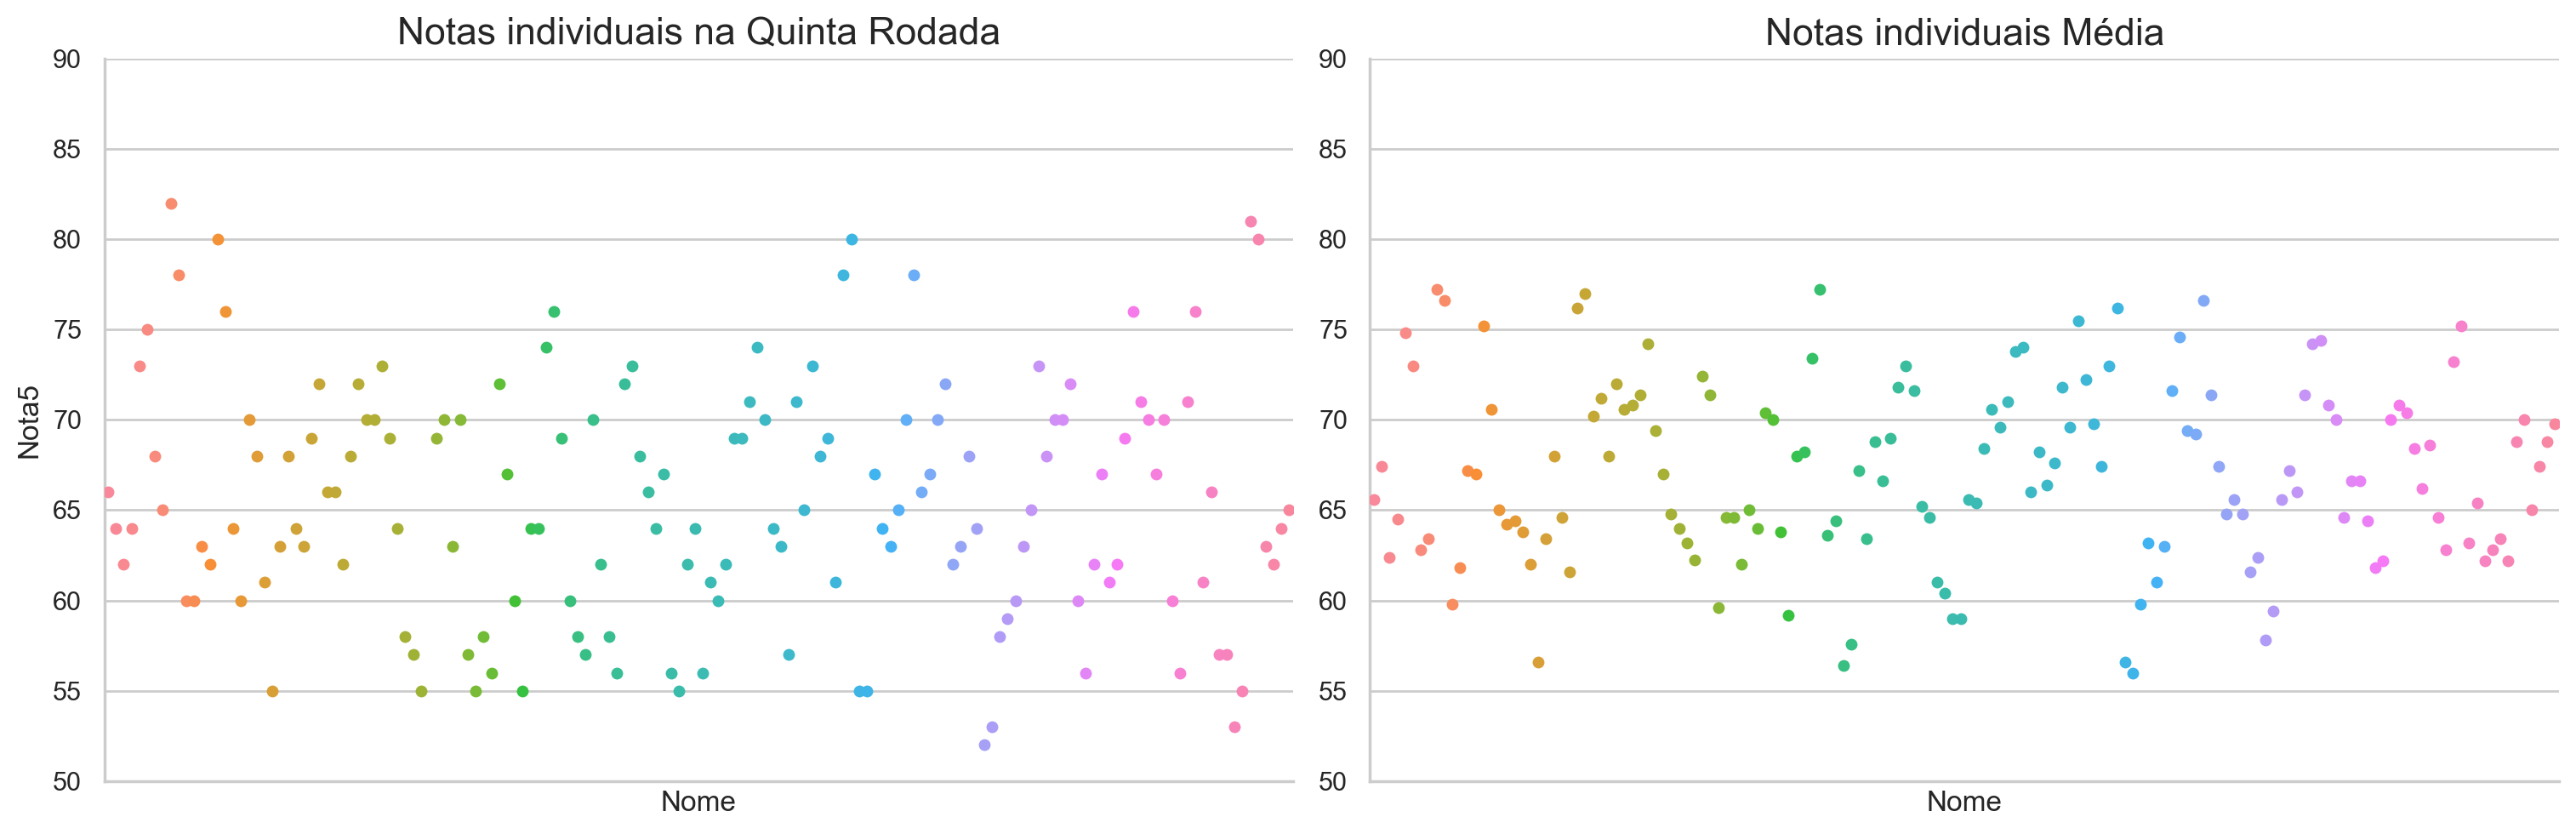

In [165]:
plt.figure(figsize=(45,5),dpi=200)
plt.subplot(1,6,1)
a=sns.swarmplot(x="Nome",y="Nota1",data=vopen)
a.set_title('Notas individuais na Primeira Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
plt.subplot(1,6,2)
a=sns.swarmplot(x="Nome",y="Nota2",data=vopen)
a.set_title('Notas individuais na Segunda Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
sns.despine()
plt.tight_layout()
plt.figure(figsize=(45,5),dpi=200)
plt.subplot(1,6,1)
a=sns.swarmplot(x="Nome",y="Nota3",data=vopen)
a.set_title('Notas individuais na Terceira Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
plt.subplot(1,6,2)
a=sns.swarmplot(x="Nome",y="Nota4",data=vopen)
a.set_title('Notas individuais na Quarta Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
sns.despine()
plt.tight_layout()
plt.figure(figsize=(45,5),dpi=200)
plt.subplot(1,6,1)
a=sns.swarmplot(x="Nome",y="Nota5",data=vopen)
a.set_title('Notas individuais na Quinta Rodada',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
plt.subplot(1,6,2)
a=sns.swarmplot(x="Nome",y="Nota Final",data=vopen)
a.set_title('Notas individuais Média',fontsize=16)
a.tick_params(labelbottom=False)    
a.set_ylim([50,90])
a.set_ylabel('')
sns.despine()
plt.tight_layout()

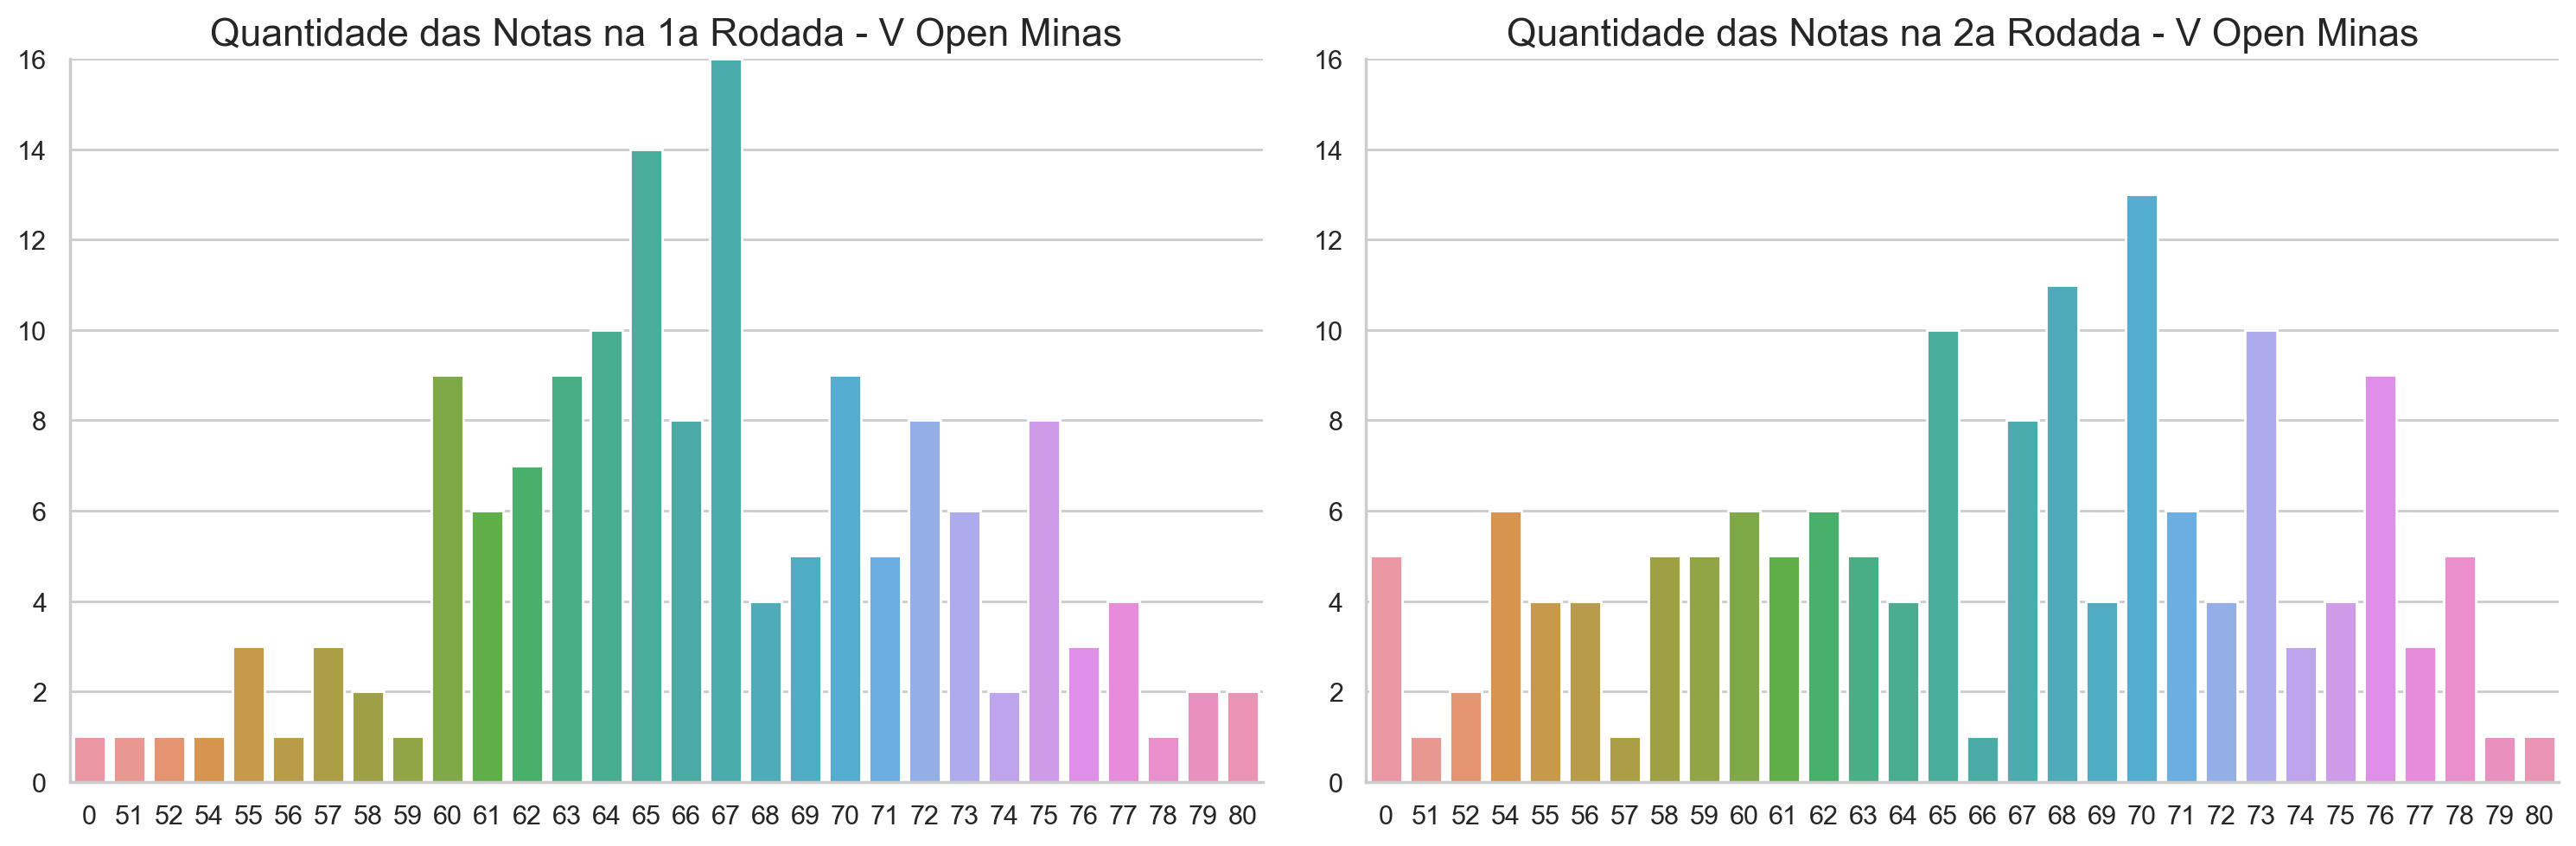

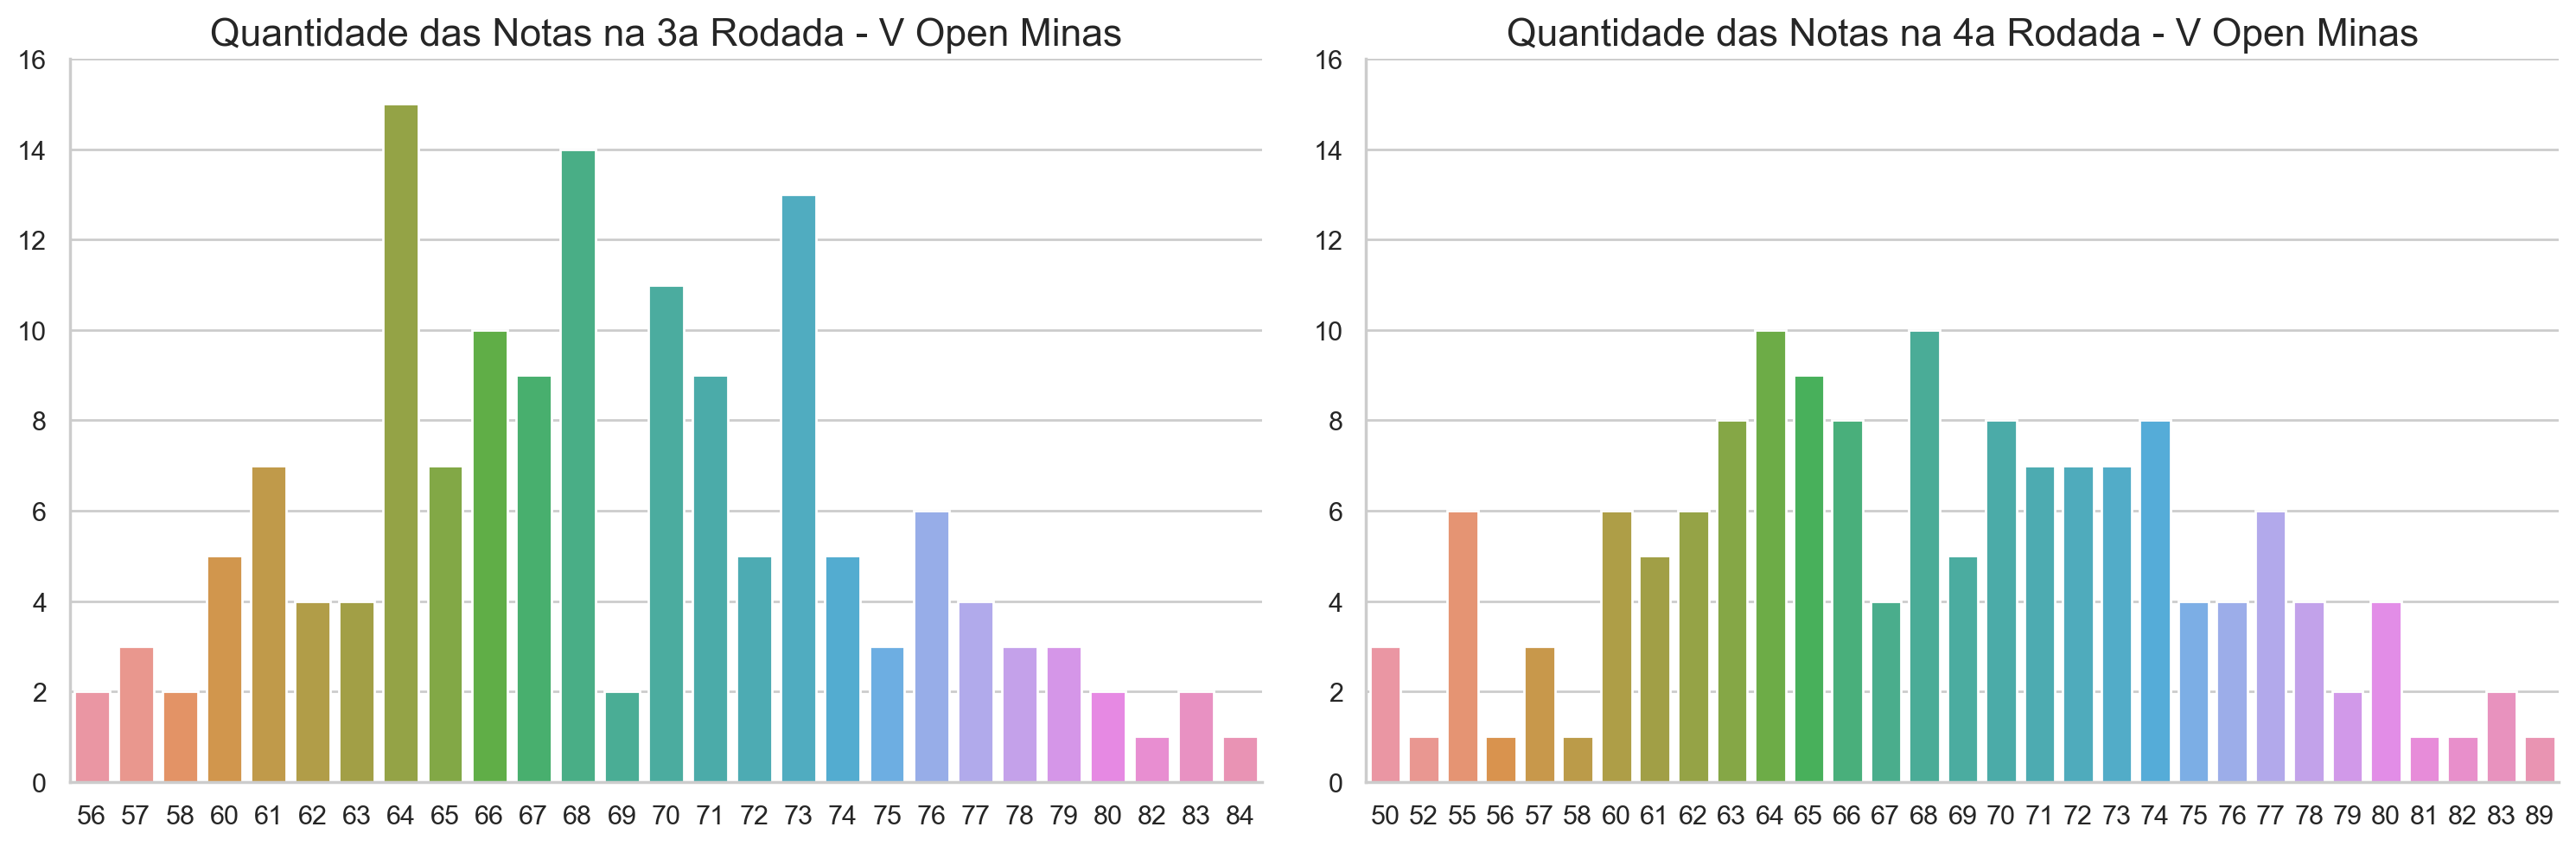

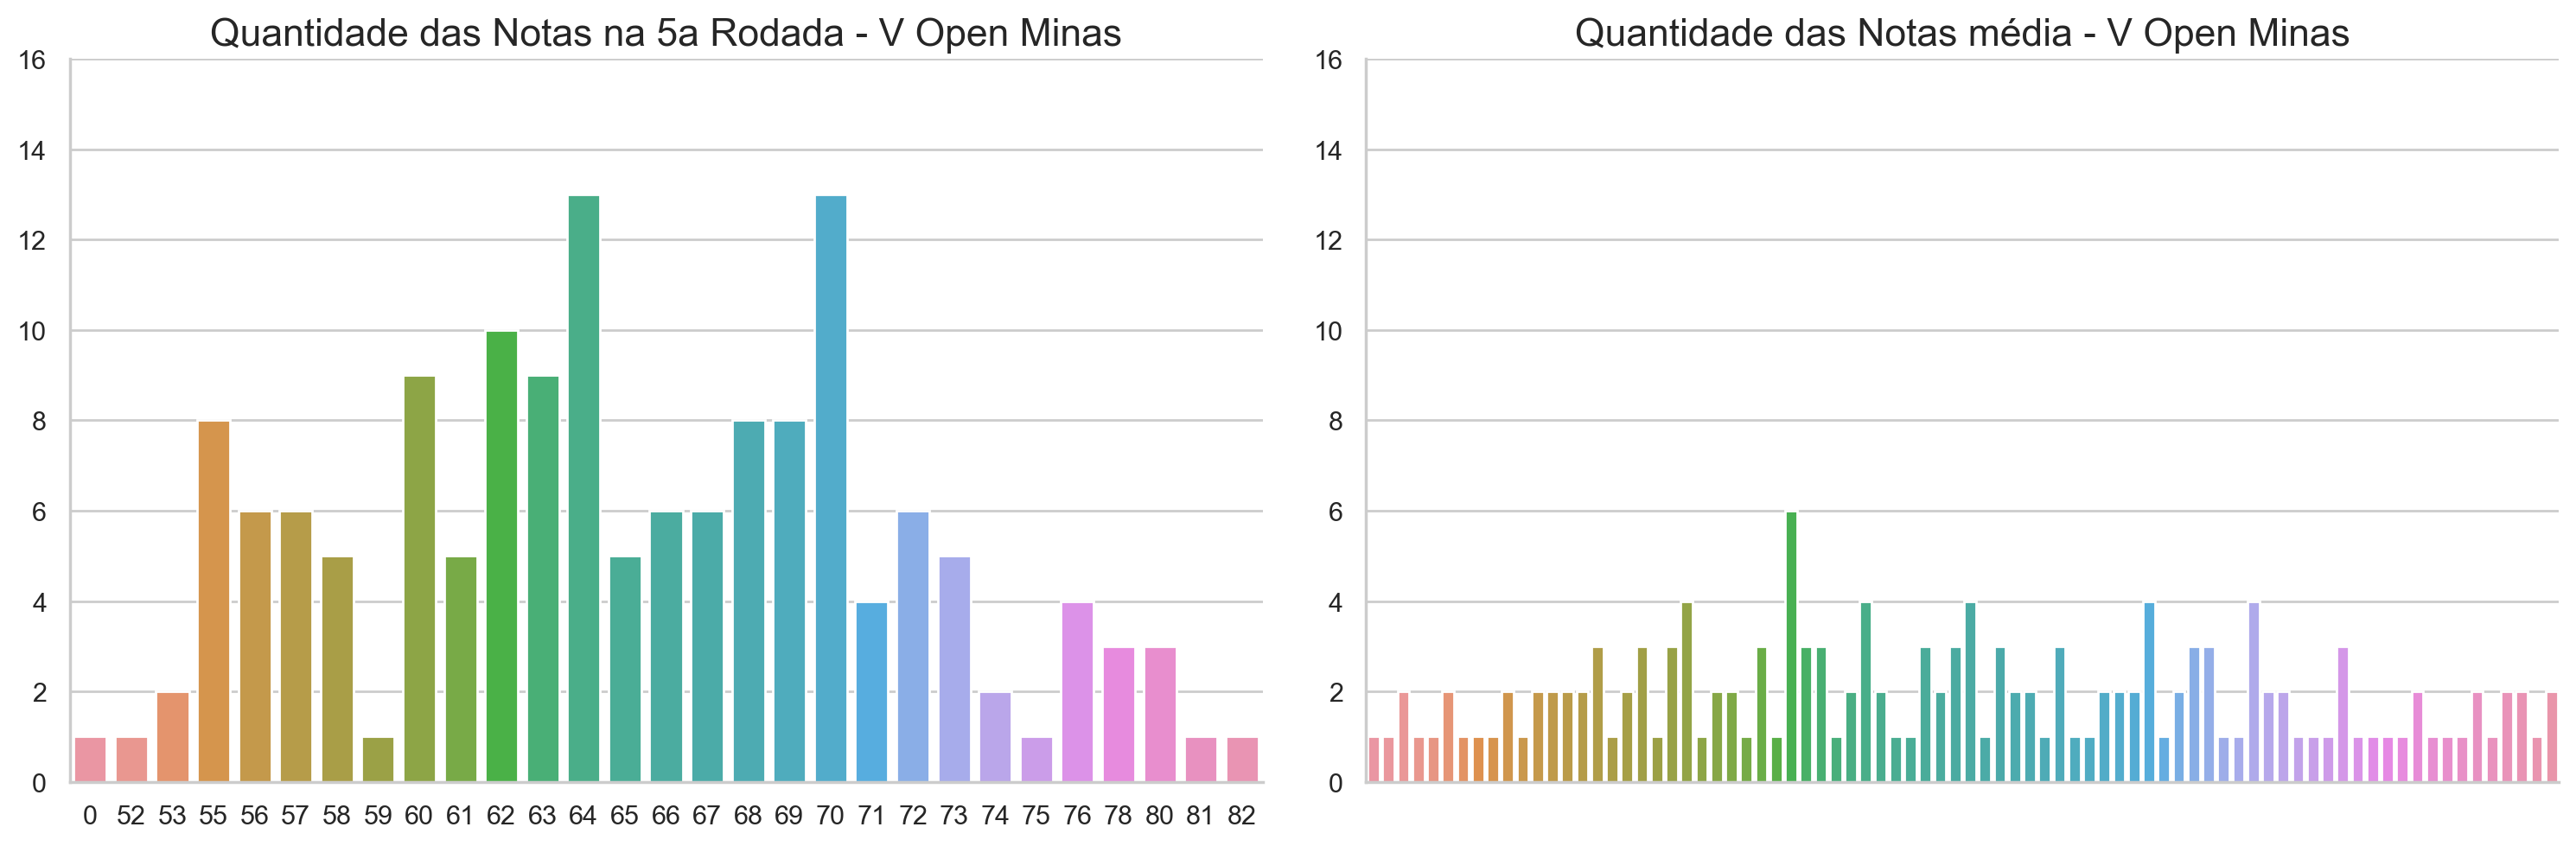

In [171]:
plt.figure(figsize=(45,5),dpi=200)
plt.subplot(1,6,1)
f=sns.countplot(x='Nota1',data=vopen)
f.set_title('Quantidade das Notas na 1a Rodada - V Open Minas',fontsize=16)
f.set_ylim([0,16])
f.set_ylabel('')
f.set_xlabel('')
plt.subplot(1,6,2)
f=sns.countplot(x='Nota2',data=vopen)
f.set_title('Quantidade das Notas na 2a Rodada - V Open Minas',fontsize=16)
f.set_ylim([0,16])
f.set_ylabel('')
f.set_xlabel('')
sns.despine()
plt.tight_layout()
plt.figure(figsize=(45,5),dpi=200)
plt.subplot(1,6,1)
f=sns.countplot(x='Nota3',data=vopen)
f.set_title('Quantidade das Notas na 3a Rodada - V Open Minas',fontsize=16)
f.set_ylim([0,16])
f.set_ylabel('')
f.set_xlabel('')
plt.subplot(1,6,2)
f=sns.countplot(x='Nota4',data=vopen)
f.set_title('Quantidade das Notas na 4a Rodada - V Open Minas',fontsize=16)
f.set_ylim([0,16])
f.set_ylabel('')
f.set_xlabel('')
sns.despine()
plt.tight_layout()
plt.figure(figsize=(45,5),dpi=200)
plt.subplot(1,6,1)
f=sns.countplot(x='Nota5',data=vopen)
f.set_title('Quantidade das Notas na 5a Rodada - V Open Minas',fontsize=16)
f.set_ylim([0,16])
f.set_ylabel('')
f.set_xlabel('')
plt.subplot(1,6,2)
f=sns.countplot(x='Nota Final',data=vopen)
f.set_title('Quantidade das Notas média - V Open Minas',fontsize=16)
f.tick_params(labelbottom=False)    
f.set_ylim([0,16])
f.set_ylabel('')
f.set_xlabel('')
sns.despine()
plt.tight_layout()

### Evolução das Notas Individuais

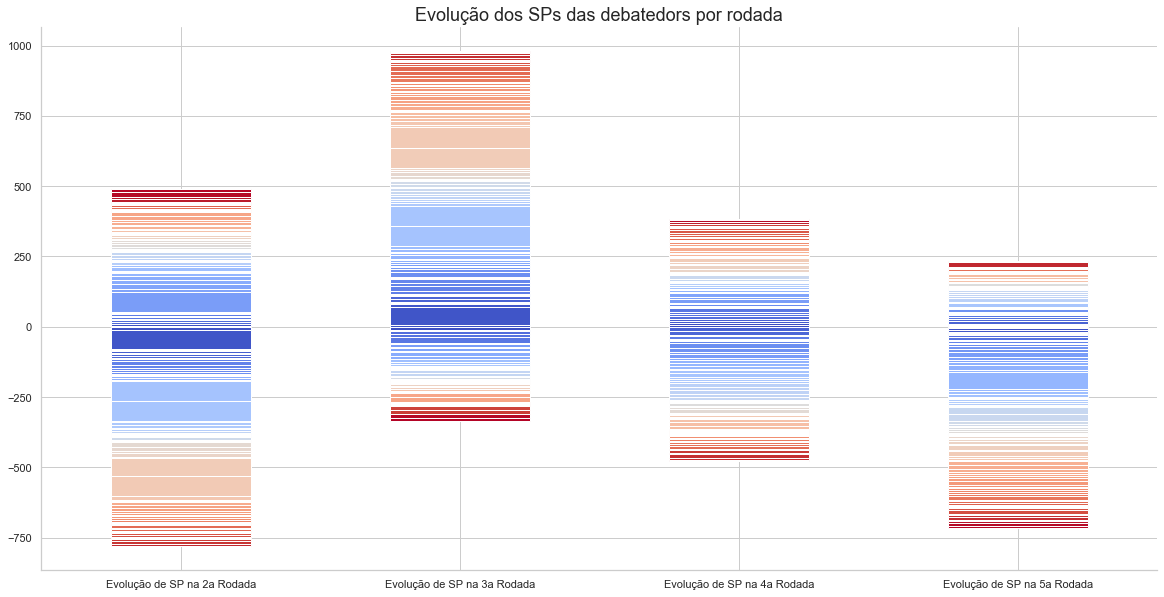

In [95]:
df12=vopen[['ID','Evolução de SP na 2a Rodada','Evolução de SP na 3a Rodada','Evolução de SP na 4a Rodada',
            'Evolução de SP na 5a Rodada']]
df12.set_index(['ID'],inplace=True)
k=df12.T.plot(kind='bar',rot=360,stacked=True,figsize=(20,10),legend=False,colormap='coolwarm')
k.set_xlabel('')
k.set_title('Evolução dos SPs das debatedors por rodada',fontsize=18)
sns.despine()
plt.show()

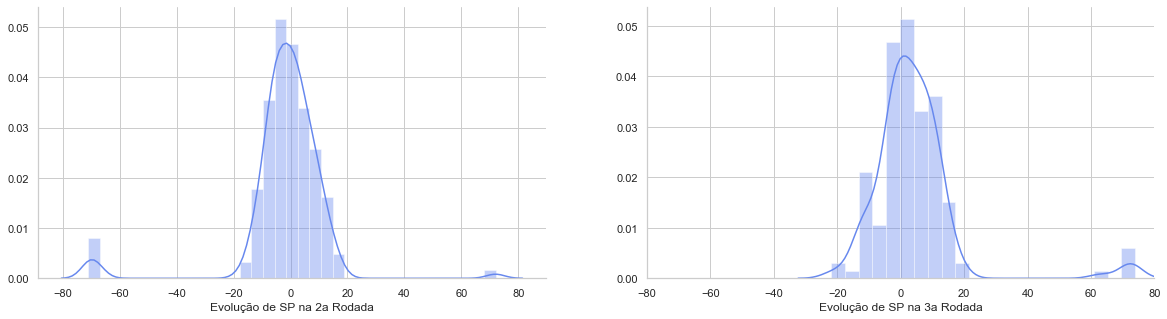

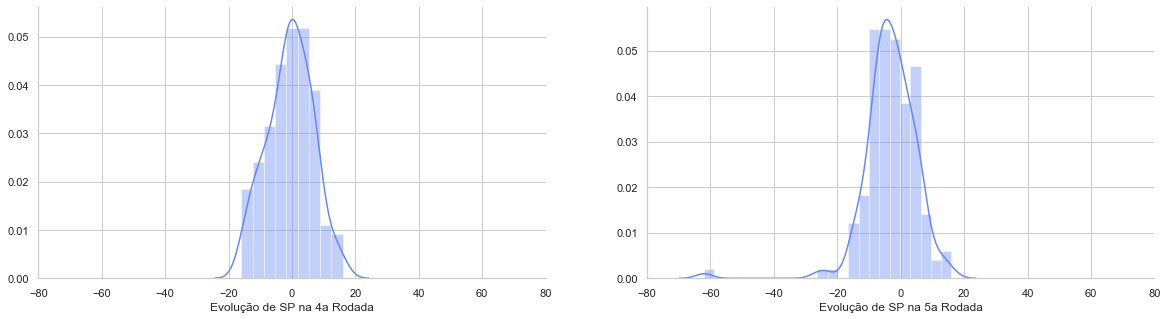

In [140]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(vopen['Evolução de SP na 2a Rodada'])
plt.subplot(1,2,2)
sns.distplot(vopen['Evolução de SP na 3a Rodada']).set_xlim(-80,80)
sns.despine()
plt.show()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(vopen['Evolução de SP na 4a Rodada']).set_xlim(-80,80)
plt.subplot(1,2,2)
sns.distplot(vopen['Evolução de SP na 5a Rodada']).set_xlim(-80,80)
sns.despine()
plt.show()

In [7]:
Evolução_de_SP_na_5a_Rodada=[]
Evolução_de_SP_na_4a_Rodada=[]
Evolução_de_SP_na_3a_Rodada=[]
Evolução_de_SP_na_2a_Rodada=[]
Evolução_de_SP_na_1a_Rodada=[]
vopen.sort_values(by=['ID'],inplace=True)
for i in range(1,int(len(vopen)/2)+1):
    Evolução_da_Rodada=list(vopen[vopen['ID']==i]['Nota5'].values-vopen[vopen['ID']==i]['Nota4'].values)
    Evolução_de_SP_na_5a_Rodada.append(Evolução_da_Rodada[0])
    Evolução_de_SP_na_5a_Rodada.append(Evolução_da_Rodada[1])
vopen['Evolução de SP na 5a Rodada']=Evolução_de_SP_na_5a_Rodada
for i in range(1,int(len(vopen)/2)+1):
    Evolução_da_Rodada=list(vopen[vopen['ID']==i]['Nota4'].values-vopen[vopen['ID']==i]['Nota3'].values)
    Evolução_de_SP_na_4a_Rodada.append(Evolução_da_Rodada[0])
    Evolução_de_SP_na_4a_Rodada.append(Evolução_da_Rodada[1])
vopen['Evolução de SP na 4a Rodada']=Evolução_de_SP_na_4a_Rodada
for i in range(1,int(len(vopen)/2)+1):
    Evolução_da_Rodada=list(vopen[vopen['ID']==i]['Nota3'].values-vopen[vopen['ID']==i]['Nota2'].values)
    Evolução_de_SP_na_3a_Rodada.append(Evolução_da_Rodada[0])
    Evolução_de_SP_na_3a_Rodada.append(Evolução_da_Rodada[1])
vopen['Evolução de SP na 3a Rodada']=Evolução_de_SP_na_3a_Rodada
for i in range(1,int(len(vopen)/2)+1):
    Evolução_da_Rodada=list(vopen[vopen['ID']==i]['Nota2'].values-vopen[vopen['ID']==i]['Nota1'].values)
    Evolução_de_SP_na_2a_Rodada.append(Evolução_da_Rodada[0])
    Evolução_de_SP_na_2a_Rodada.append(Evolução_da_Rodada[1])
vopen['Evolução de SP na 2a Rodada']=Evolução_de_SP_na_2a_Rodada
vopen.head()

ID                  Nome          SD  Ponto1  Nota1  Sala1  Ponto2  \
84    1        Renato Quintão    Octógono       1     63      1       1   
68    1        Felipe Barreto    Octógono       1     64      1       1   
124   2   Fabiano Mascarenhas  USP Debate       3     67      1       1   
103   2        Vitor Graziani  USP Debate       3     69      1       1   
10    3  Pedro Jorge Medeiros      SdDUFC       4     73      1       3   

     Nota2  Sala2  Ponto3  ...  Nota Final     Rodada  1D  1O  2D  2O  \
84      65     34       1  ...        65.6  1ª Rodada   5   6   7   8   
68      73     34       1  ...        67.4  1ª Rodada   1   2   3   4   
124     56     27       2  ...        62.4  1ª Rodada  13  14  15  16   
103      0     27       2  ...        64.5  1ª Rodada   9  10  11  12   
10      70     24       4  ...        74.8  1ª Rodada  17  18  19  20   

     Evolução de SP na 5a Rodada  Evolução de SP na 4a Rodada  \
84                            -4                            6   
68                            -8                            8   
124                           -1                           -1   
103                            2                           -1   
10                            -6                            0   

     Evolução de SP na 3a Rodada  Evolução de SP na 2a Rodada  
84                            -1                            2  
68                            -9                            9  
124                            8                          -11  
103                           63                          -69  
10                             9                           -3  

[5 rows x 30 columns]

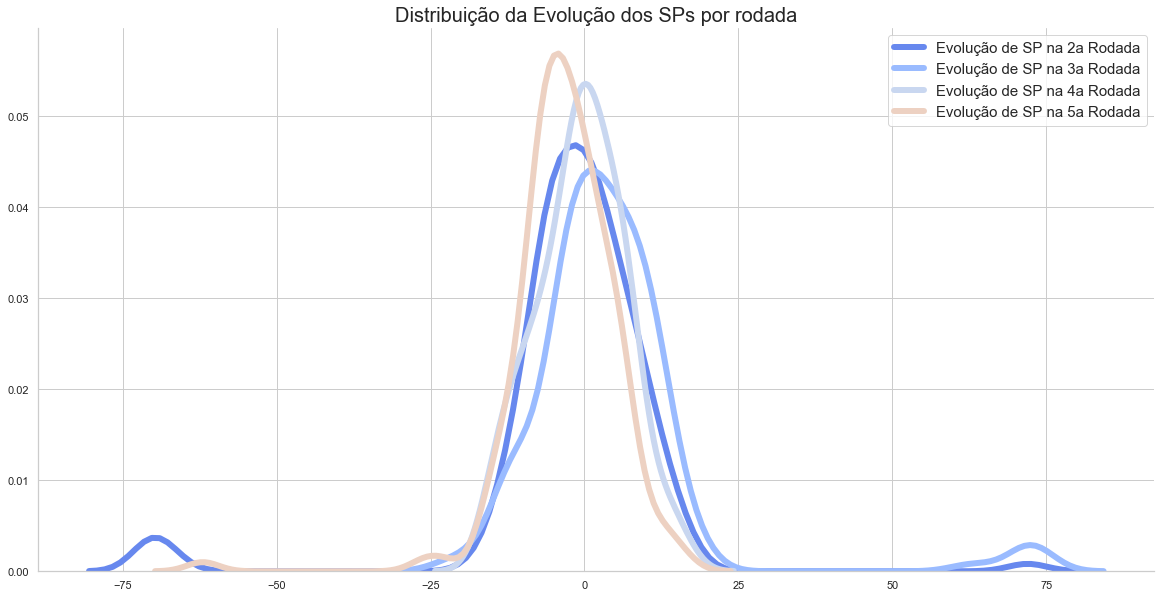

In [121]:
plt.figure(figsize=(20,10))
sns.kdeplot(vopen['Evolução de SP na 2a Rodada'],linewidth=6)
sns.kdeplot(vopen['Evolução de SP na 3a Rodada'],linewidth=6)
sns.kdeplot(vopen['Evolução de SP na 4a Rodada'],linewidth=6)
sns.kdeplot(vopen['Evolução de SP na 5a Rodada'],linewidth=6).set_title('Distribuição da Evolução dos SPs por rodada',size=20)
plt.legend(prop={'size':15})
sns.despine()
plt.show()

In [18]:
Evolução_de_SP_na_5a_Rodada=[]
Evolução_de_SP_na_4a_Rodada=[]
Evolução_de_SP_na_3a_Rodada=[]
Evolução_de_SP_na_2a_Rodada=[]
Evolução_de_SP_na_1a_Rodada=[]
for i in range(1,int(len(vopen)/2)+1):
    Evolução_da_Rodada=vopen[vopen['ID']==i]['Nota5'].values-vopen[vopen['ID']==i]['Nota Final'].values
    Evolução_de_SP_na_5a_Rodada.append(Evolução_da_Rodada[0])
    Evolução_de_SP_na_5a_Rodada.append(Evolução_da_Rodada[1])
vopen['Diferença em relação à Nota Final - 5a Rodada']=Evolução_de_SP_na_5a_Rodada
for i in range(1,int(len(vopen)/2)+1):
    Evolução_da_Rodada=vopen[vopen['ID']==i]['Nota4'].values-vopen[vopen['ID']==i]['Nota Final'].values
    Evolução_de_SP_na_4a_Rodada.append(Evolução_da_Rodada[0])
    Evolução_de_SP_na_4a_Rodada.append(Evolução_da_Rodada[1])
vopen['Diferença em relação à Nota Final - 3a Rodada']=Evolução_de_SP_na_4a_Rodada
for i in range(1,int(len(vopen)/2)+1):
    Evolução_da_Rodada=vopen[vopen['ID']==i]['Nota3'].values-vopen[vopen['ID']==i]['Nota Final'].values
    Evolução_de_SP_na_3a_Rodada.append(Evolução_da_Rodada[0])
    Evolução_de_SP_na_3a_Rodada.append(Evolução_da_Rodada[1])
vopen['Diferença em relação à Nota Final - 4a Rodada']=Evolução_de_SP_na_3a_Rodada
for i in range(1,int(len(vopen)/2)+1):
    Evolução_da_Rodada=vopen[vopen['ID']==i]['Nota2'].values-vopen[vopen['ID']==i]['Nota Final'].values
    Evolução_de_SP_na_2a_Rodada.append(Evolução_da_Rodada[0])
    Evolução_de_SP_na_2a_Rodada.append(Evolução_da_Rodada[1])
vopen['Diferença em relação à Nota Final - 2a Rodada']=Evolução_de_SP_na_2a_Rodada
for i in range(1,int(len(vopen)/2)+1):
    Evolução_da_Rodada=vopen[vopen['ID']==i]['Nota1'].values-vopen[vopen['ID']==i]['Nota Final'].values
    Evolução_de_SP_na_1a_Rodada.append(Evolução_da_Rodada[0])
    Evolução_de_SP_na_1a_Rodada.append(Evolução_da_Rodada[1])
vopen['Diferença em relação à Nota Final - 1a Rodada']=Evolução_de_SP_na_1a_Rodada
vopen.head()

ID                  Nome          SD  Ponto1  Nota1  Sala1  Ponto2  \
84    1        Renato Quintão    Octógono       1     63      1       1   
68    1        Felipe Barreto    Octógono       1     64      1       1   
124   2   Fabiano Mascarenhas  USP Debate       3     67      1       1   
103   2        Vitor Graziani  USP Debate       3     69      1       1   
10    3  Pedro Jorge Medeiros      SdDUFC       4     73      1       3   

     Nota2  Sala2  Ponto3  ...  2O  Evolução de SP na 5a Rodada  \
84      65     34       1  ...   8                           -4   
68      73     34       1  ...   4                           -8   
124     56     27       2  ...  16                           -1   
103      0     27       2  ...  12                            2   
10      70     24       4  ...  20                           -6   

     Evolução de SP na 4a Rodada  Evolução de SP na 3a Rodada  \
84                             6                           -1   
68                             8                           -9   
124                           -1                            8   
103                           -1                           63   
10                             0                            9   

     Evolução de SP na 2a Rodada  \
84                             2   
68                             9   
124                          -11   
103                          -69   
10                            -3   

     Diferença em relação à Nota Final - 5a Rodada  \
84                                             0.4   
68                                            -3.4   
124                                           -0.4   
103                                           -0.5   
10                                            -1.8   

     Diferença em relação à Nota Final - 3a Rodada  \
84                                             4.4   
68                                             4.6   
124                                            0.6   
103                                           -2.5   
10                                             4.2   

     Diferença em relação à Nota Final - 4a Rodada  \
84                                            -1.6   
68                                            -3.4   
124                                            1.6   
103                                           -1.5   
10                                             4.2   

     Diferença em relação à Nota Final - 2a Rodada  \
84                                            -0.6   
68                                             5.6   
124                                           -6.4   
103                                          -64.5   
10                                            -4.8   

     Diferença em relação à Nota Final - 1a Rodada  
84                                            -2.6  
68                                            -3.4  
124                                            4.6  
103                                            4.5  
10                                            -1.8  

[5 rows x 35 columns]

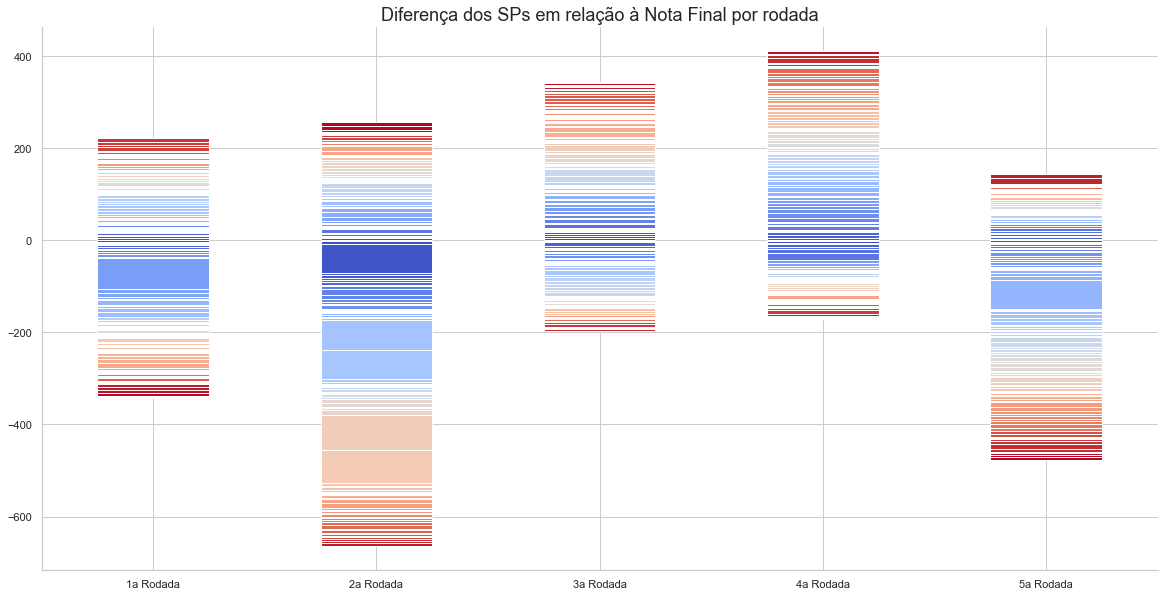

In [144]:
df12=vopen[['ID','Diferença em relação à Nota Final - 1a Rodada','Diferença em relação à Nota Final - 2a Rodada','Diferença em relação à Nota Final - 3a Rodada',
                'Diferença em relação à Nota Final - 4a Rodada','Diferença em relação à Nota Final - 5a Rodada']]
df12.set_index(['ID'],inplace=True)
k=df12.T.plot(kind='bar',rot=360,figsize=(20,10),stacked=True,legend=False,colormap='coolwarm')
k.set_xlabel('')
k.set_title('Diferença dos SPs em relação à Nota Final por rodada',fontsize=18)
k.set_xticklabels(labels=['1a Rodada','2a Rodada','3a Rodada','4a Rodada','5a Rodada'])
sns.despine()
plt.show()

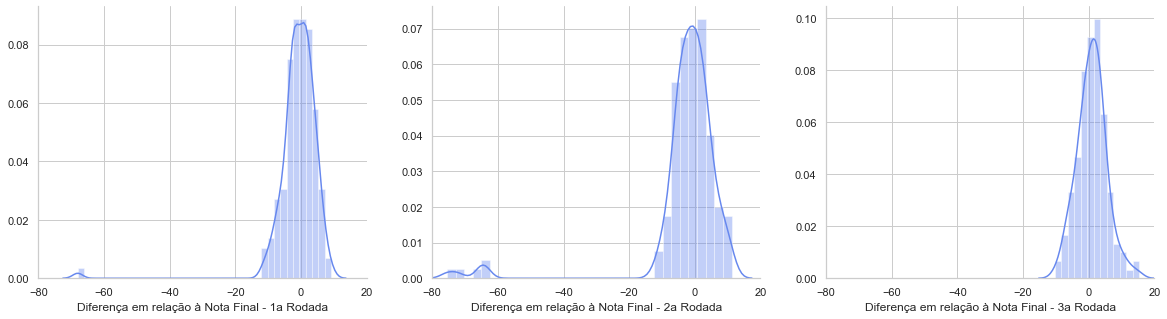

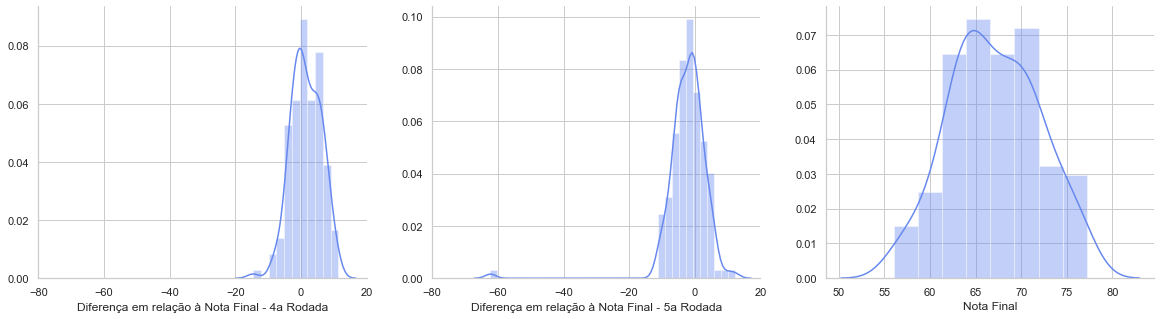

In [150]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(vopen['Diferença em relação à Nota Final - 1a Rodada']).set_xlim(-80,20)
plt.subplot(1,3,2)
sns.distplot(vopen['Diferença em relação à Nota Final - 2a Rodada']).set_xlim(-80,20)
plt.subplot(1,3,3)
sns.distplot(vopen['Diferença em relação à Nota Final - 3a Rodada']).set_xlim(-80,20)
sns.despine()
plt.show()
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.distplot(vopen['Diferença em relação à Nota Final - 4a Rodada']).set_xlim(-80,20)
plt.subplot(1,3,2)
sns.distplot(vopen['Diferença em relação à Nota Final - 5a Rodada']).set_xlim(-80,20)
plt.subplot(1,3,3)
sns.distplot(vopen['Nota Final'])
sns.despine()
plt.show()

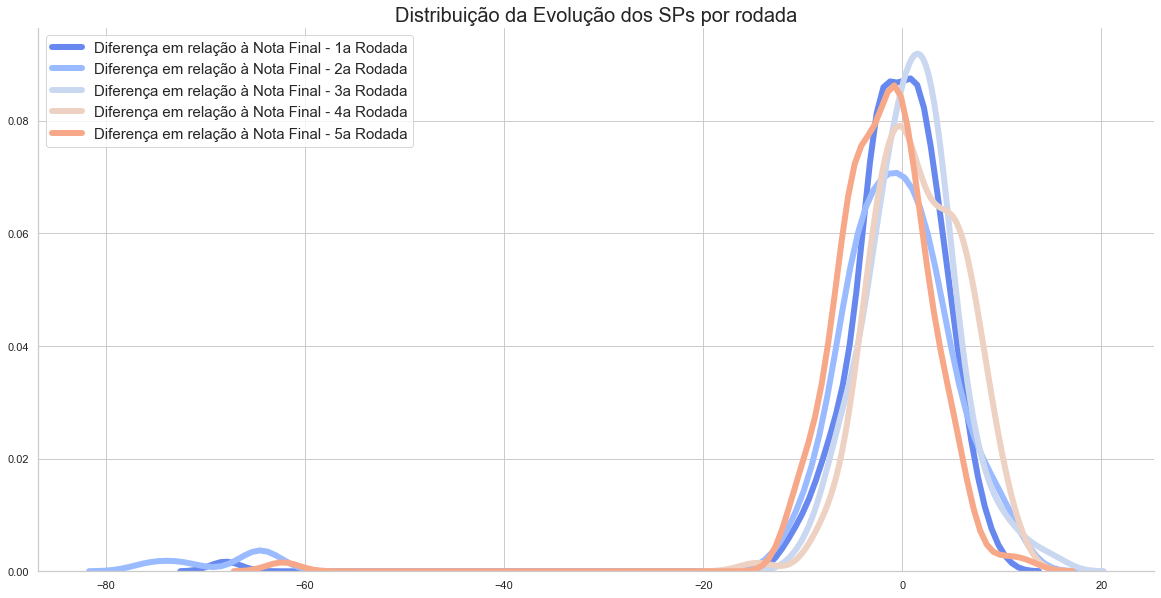

In [151]:
plt.figure(figsize=(20,10))
sns.kdeplot(vopen['Diferença em relação à Nota Final - 1a Rodada'],linewidth=6)
sns.kdeplot(vopen['Diferença em relação à Nota Final - 2a Rodada'],linewidth=6)
sns.kdeplot(vopen['Diferença em relação à Nota Final - 3a Rodada'],linewidth=6)
sns.kdeplot(vopen['Diferença em relação à Nota Final - 4a Rodada'],linewidth=6)
sns.kdeplot(vopen['Diferença em relação à Nota Final - 5a Rodada'],linewidth=6).set_title('Distribuição da Evolução dos SPs por rodada',size=20)
plt.legend(prop={'size':15})
sns.despine()
plt.show()

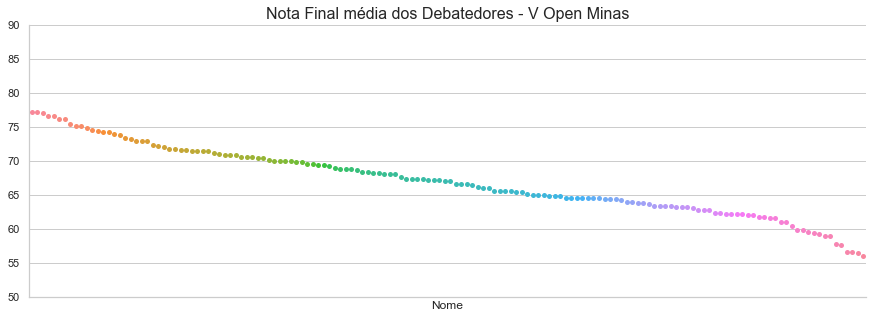

In [57]:
plt.figure(figsize=(15,5))
ax=plt.axes()
ax.set_title('Nota Final média dos Debatedores - V Open Minas',fontsize=16)
sns.swarmplot(x="Nome",y="Nota Final",data=vopen).set_ylim(50,90)
ax.set_ylabel('')    
ax.tick_params(labelbottom=False)    
sns.despine()
plt.show()